### Student Information
Name:洪梓勛

Student ID:113061541

GitHub ID:THH1118

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas.
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__.

### Second Phase Submission

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__.

# Phase 1

In [1]:
#step0
import pandas as pd

df = pd.read_csv('/content/Reddit-stock-sentiment.csv')#須將資料集放在這邊的路徑上或自訂路徑
print("資料筆數：", len(df))
print("欄位名稱：", df.columns.tolist())
df.head(3)

資料筆數： 847
欄位名稱： ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [2]:
#exercise1
for i, row in df.head(3).iterrows():
    snippet = row["text"]
    label = row["label"]
    print(f"\n=== Sample {i} | label: {label} ===\n{snippet}")


=== Sample 0 | label: -1.0 ===
Calls on retards

=== Sample 1 | label: 0.0 ===
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

=== Sample 2 | label: 0.0 ===
Seeing lots of red in the ticker.


In [3]:
#exercise2
print(df[['text', 'label']].head(10))
print(df.iloc[4:8][['text', 'label']])
print(df.loc[1:3, ['text', 'label']])
print(df[df['label'] == 1.0][['text', 'label']].head(3))
df['text_length'] = df['text'].apply(lambda x: len(str(x)))
print(df[df['text_length'] > 50][['text', 'label']].head(3))

                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0
6  Trump will respond to china increasing their t...   -1.0
7  Confirmed not a trap. Its been like this for p...    0.0
8  Am I the only one seeing the cup & handle brea...    1.0
9  HLGN is $10. Hurry and catch it now before it ...    1.0
                                                text  label
4                           He didn’t say thank you.   -1.0
5  Hoping to ejaculate in wet warm puss tonight, ...    0.0
6  Trump will respond to china increasing their t...   -1.0
7  Confirmed not a trap. Its been like this for p...    0.0
                                        

In [4]:
#exercise3
pos_df = df[df['subreddit'] == 'wallstreetbets']
pos_every10 = pos_df.iloc[::10]
print(pos_every10[['text', 'label']].head(5))


                                                  text  label
0                                     Calls on retards   -1.0
40   These China AI factory memes are pretty good. ...    0.0
96                         200k loss in a month.. haha   -1.0
183  My resume isn't even read by companies anymore...   -1.0
227  #Ban Bet Lost\n\n/u/Local-Wall-4359 made a bet...    0.0


In [5]:
#exercise4
missing_per_row = df.isnull().sum(axis=1)
print(missing_per_row.head(10))
print("\nat least one missing value：", (missing_per_row > 0).sum())
#有多少篇文章至少缺少一個欄位的值

0    2
1    2
2    2
3    0
4    2
5    2
6    2
7    2
8    2
9    2
dtype: int64

at least one missing value： 783


subreddit： 4

各類別出現次數：
 subreddit
stocks              274
StockMarket         250
stockstobuytoday    174
wallstreetbets      149
Name: count, dtype: int64


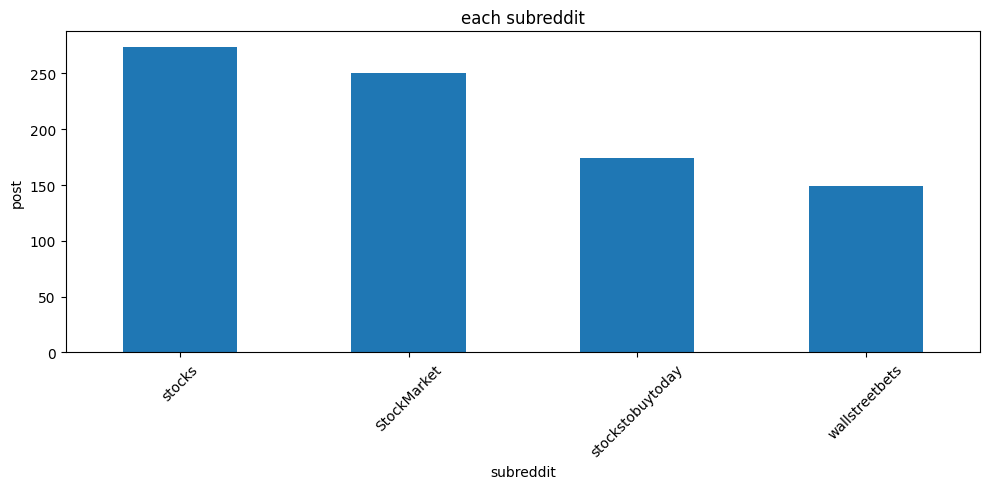

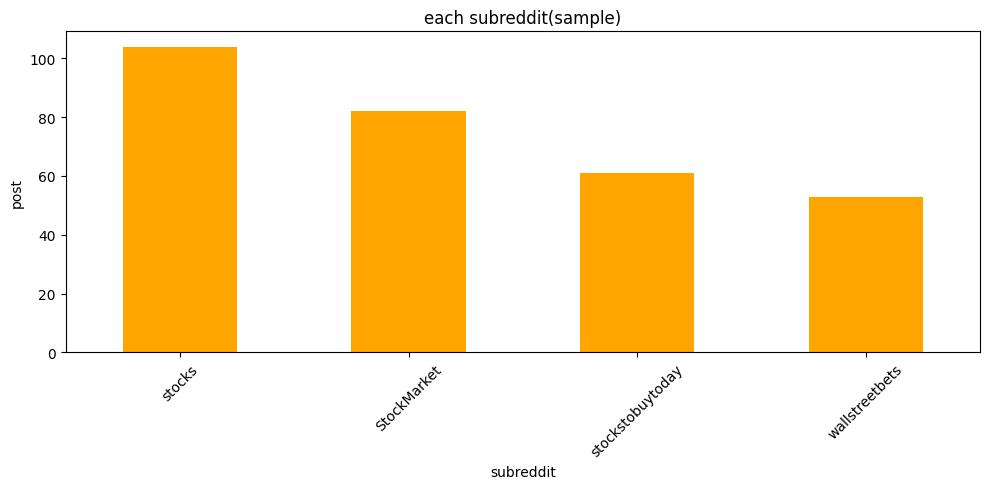

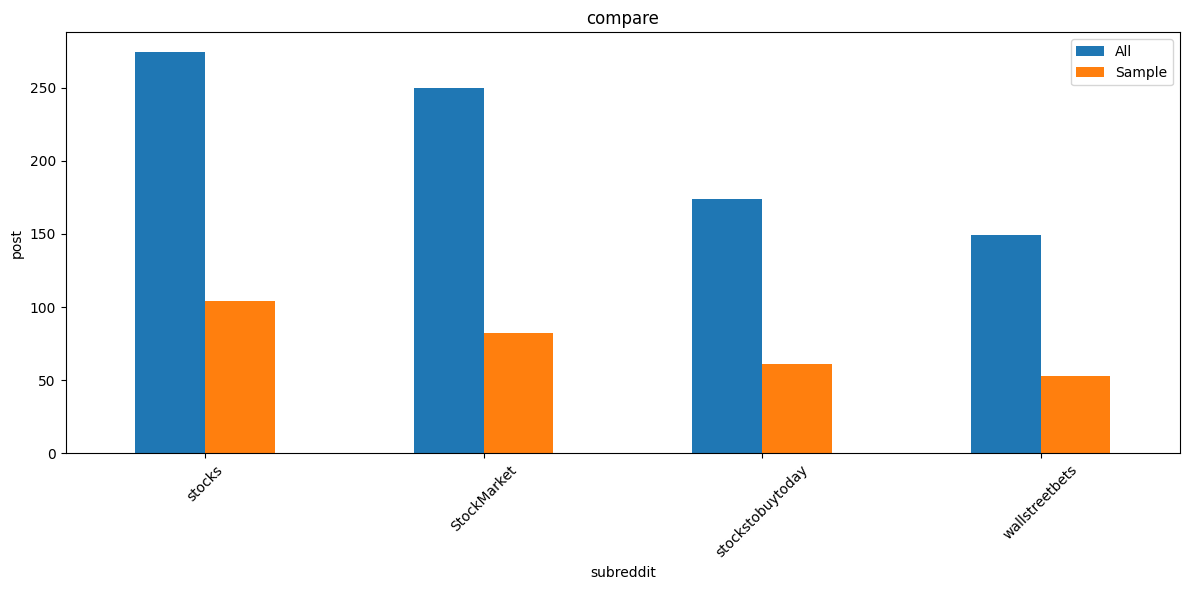

In [6]:
#exercise5跳過(skip)
#exercise6 & exercise8
sub_counts = df['subreddit'].value_counts()
print("subreddit：", df['subreddit'].nunique())
print("\n各類別出現次數：\n", sub_counts)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sub_counts.plot(kind='bar')
plt.title("each subreddit")
plt.ylabel("post")
plt.xlabel("subreddit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
X_sample = df.sample(n=300, random_state=42)
sample_sub_counts = X_sample['subreddit'].value_counts()

plt.figure(figsize=(10,5))
sample_sub_counts.plot(kind='bar', color='orange')
plt.title("each subreddit(sample)")
plt.ylabel("post")
plt.xlabel("subreddit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
import pandas as pd

df_compare = pd.DataFrame({
    'All': sub_counts,
    'Sample': sample_sub_counts
}).fillna(0).astype(int)

df_compare.plot(kind='bar', figsize=(12,6))
plt.title("compare")
plt.ylabel("post")
plt.xlabel("subreddit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


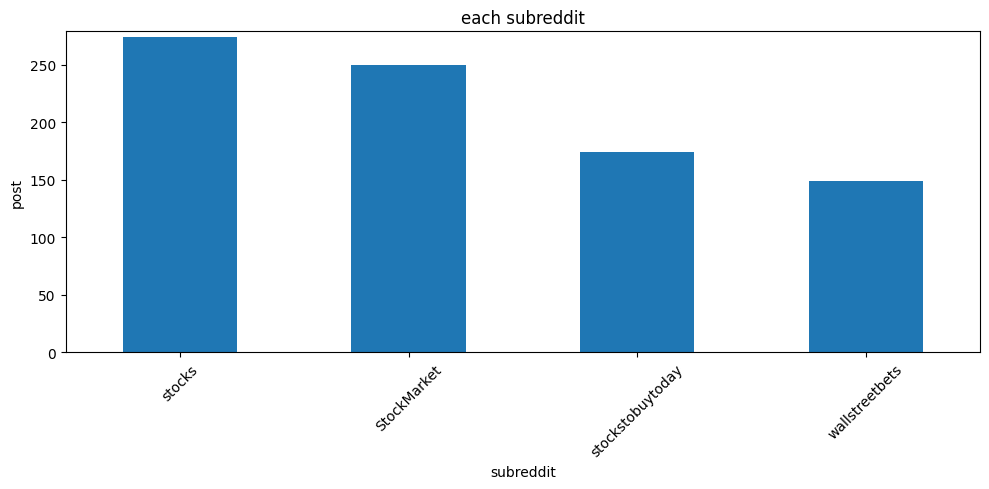

In [7]:
#exercise7
import matplotlib.pyplot as plt

sub_counts = df['subreddit'].value_counts()
y_max = sub_counts.max()

plt.figure(figsize=(10,5))
sub_counts.plot(kind='bar')
plt.title("each subreddit")
plt.ylabel("post")
plt.xlabel("subreddit")
plt.xticks(rotation=45)
plt.ylim([0, y_max + 5])
plt.tight_layout()
plt.show()

In [8]:
#exercise8 already done with exercise6
#exercise9
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
first_text = df['text'].iloc[0]
tokens = analyze(first_text)
print("first text：\n", first_text)
print("\ntokens：")
print(tokens)

first text：
 Calls on retards

tokens：
['calls', 'on', 'retards']


In [9]:
#exercise10
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])  # sparse matrix
row = X_counts[4]
indices = row.nonzero()[1]  # find nonzero
words = [count_vect.get_feature_names_out()[i] for i in indices]
print("the words in fifth text：\n", words)


the words in fifth text：
 ['he', 'didn', 'say', 'thank', 'you']


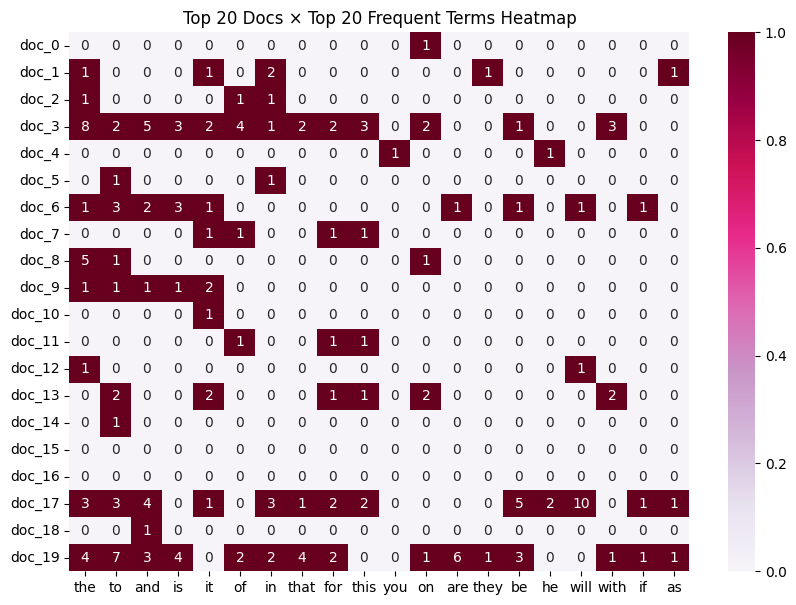

In [10]:
#exercise11，this exercise has two codes
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 取前 20 筆文件和前 20 個 feature（直接用詞頻最高的詞）
top_n_docs = 20
top_n_terms = 20

# 找出前 top_n_terms 的詞（根據全體詞頻）
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_indices = term_frequencies.argsort()[::-1][:top_n_terms]
top_terms = [count_vect.get_feature_names_out()[i] for i in top_indices]

plot_z = X_counts[:top_n_docs, top_indices].toarray()
plot_x = top_terms
plot_y = ["doc_" + str(i) for i in range(top_n_docs)]

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

plt.figure(figsize=(10, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)
plt.title("Top 20 Docs × Top 20 Frequent Terms Heatmap")
plt.show()

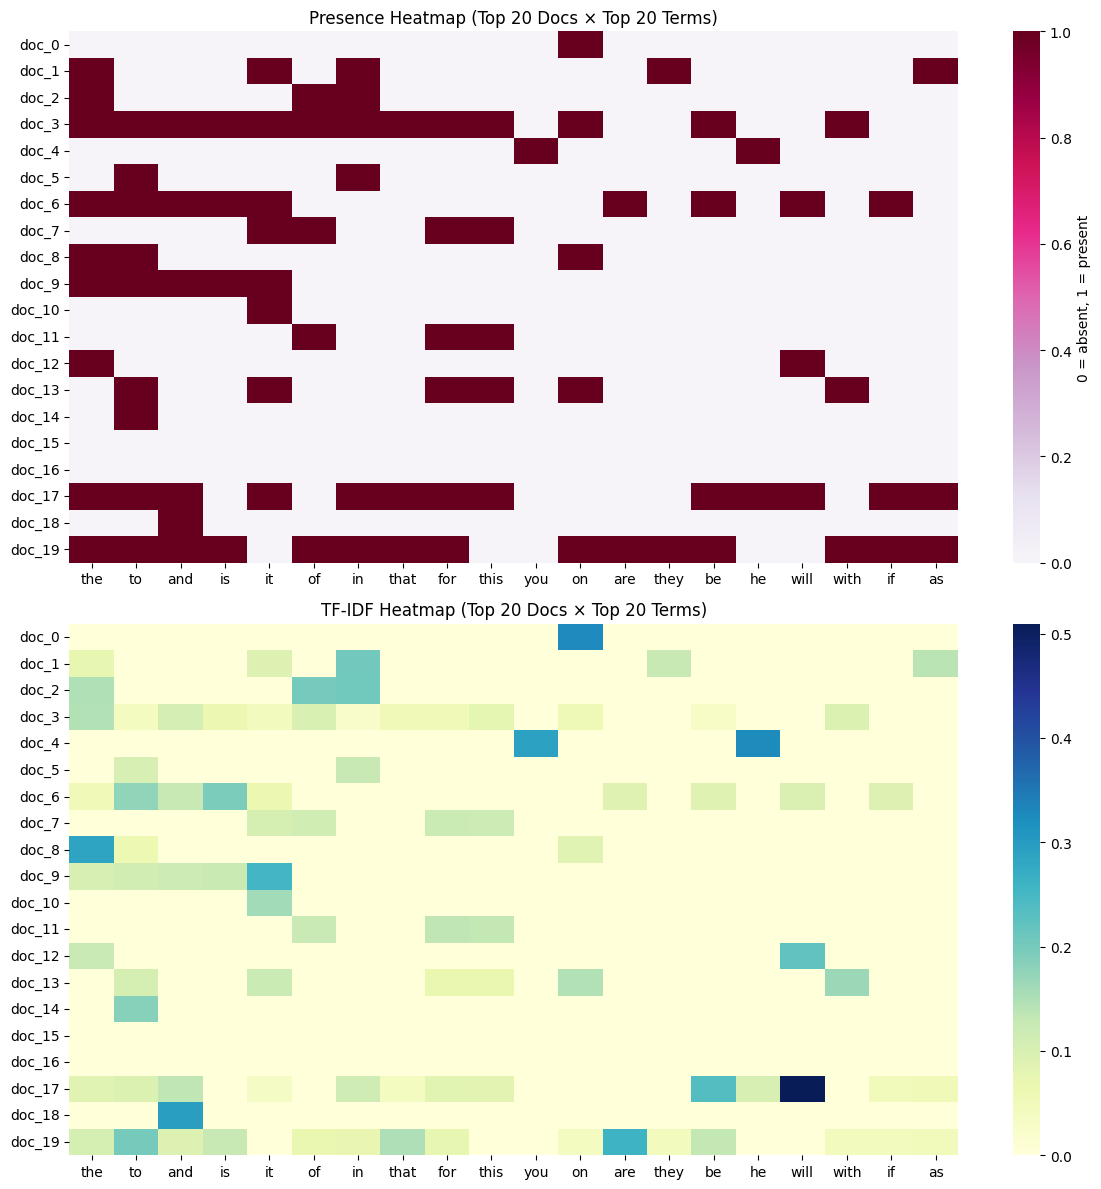

In [11]:
#exercise11
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Count-based Matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['text'])

# TF-IDF Matrix
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df['text'])

top_n_docs = 20
top_n_terms = 20

term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_indices = term_frequencies.argsort()[::-1][:top_n_terms]
top_terms = [count_vect.get_feature_names_out()[i] for i in top_indices]

plot_counts = X_counts[:top_n_docs, top_indices].toarray()
plot_tfidf = X_tfidf[:top_n_docs, top_indices].toarray()

docs = ["doc_" + str(i) for i in range(top_n_docs)]

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Presence heatmap
sns.heatmap((plot_counts > 0).astype(int), cmap="PuRd", annot=False,
            xticklabels=top_terms, yticklabels=docs,
            cbar_kws={'label': '0 = absent, 1 = present'}, ax=axes[0])
axes[0].set_title("Presence Heatmap (Top 20 Docs × Top 20 Terms)")

# TF-IDF heatmap
sns.heatmap(plot_tfidf, cmap="YlGnBu", annot=False,
            xticklabels=top_terms, yticklabels=docs, ax=axes[1])
axes[1].set_title("TF-IDF Heatmap (Top 20 Docs × Top 20 Terms)")

plt.tight_layout()
plt.show()


In [12]:
#exercise12
import plotly.express as px
import numpy as np

# frequency
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_n = 50
top_indices = np.argsort(term_frequencies)[::-1][:top_n]
top_terms = [count_vect.get_feature_names_out()[i] for i in top_indices]
top_freqs = term_frequencies[top_indices]

fig = px.bar(
    x=top_terms,
    y=top_freqs,
    labels={'x': 'Term', 'y': 'Frequency'},
    title="Top 50 Most Frequent Terms"
)
fig.update_layout(xaxis_tickangle=-90)
fig.show()

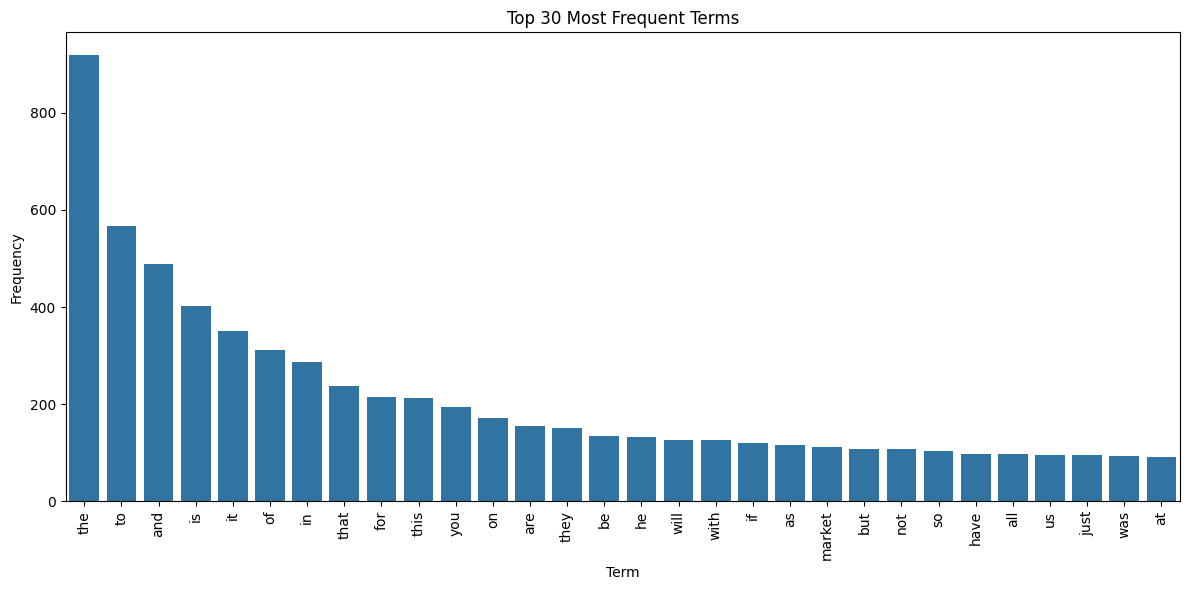

In [13]:
#exercise13
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 30
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
# only top_n
indices = np.argsort(term_frequencies)[::-1][:top_n]
top_terms = [count_vect.get_feature_names_out()[i] for i in indices]
top_freqs = term_frequencies[indices]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_freqs)
plt.xticks(rotation=90)
plt.title("Top 30 Most Frequent Terms")
plt.xlabel("Term")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


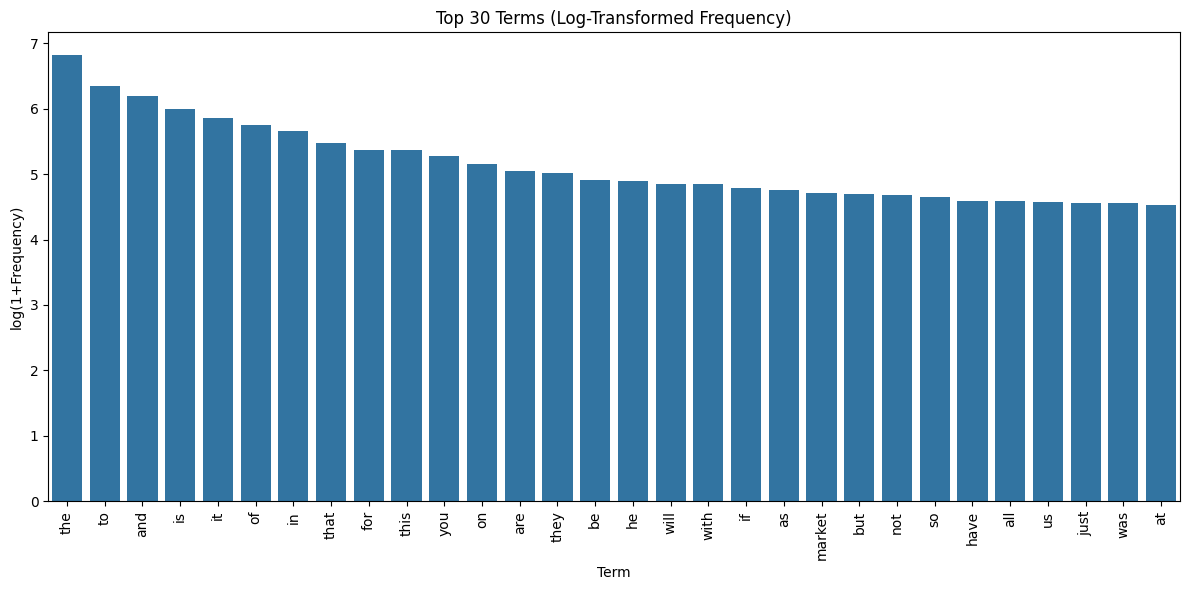

In [14]:
#exercise14 & 15
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
log_term_frequencies = np.log1p(term_frequencies)  # 避免log(0)
top_n = 30
indices = np.argsort(term_frequencies)[::-1][:top_n]
top_terms = [count_vect.get_feature_names_out()[i] for i in indices]
top_freqs_log = log_term_frequencies[indices]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=top_terms, y=top_freqs_log)
plt.xticks(rotation=90)
plt.title("Top 30 Terms (Log-Transformed Frequency)")
plt.xlabel("Term")
plt.ylabel("log(1+Frequency)")
plt.tight_layout()
plt.show()


# **Third**: please attempt the following tasks on the new dataset. This part is worth 20% of your grade.

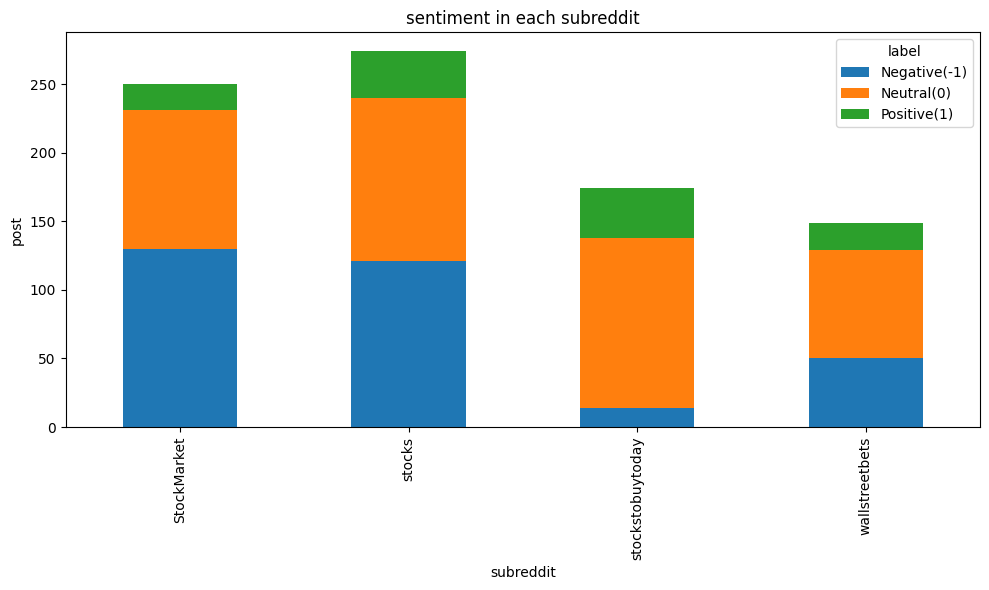

In [15]:
#third: Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
import matplotlib.pyplot as plt

pivot = df.pivot_table(index='subreddit', columns='label', values='text', aggfunc='count').fillna(0)
pivot.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("sentiment in each subreddit")
plt.ylabel("post")
plt.xlabel("subreddit")
plt.legend(title="label", labels=["Negative(-1)", "Neutral(0)", "Positive(1)"])
plt.tight_layout()
plt.show()
#explainations of the figure
#(1)The subreddits with the most negative discussions are "stocks" and "StockMarket".

#(2)"stocksbybuytoday" has a higher proportion of positive sentiment,
#which may reflect that this subreddit is mainly composed of users who recommend or are optimistic about certain stocks.

#(3)"wallstreetbets", due to its unique discussion style (which is more extreme or emotional),
#has a lower overall number of posts and a relatively low proportion of positive sentiment.

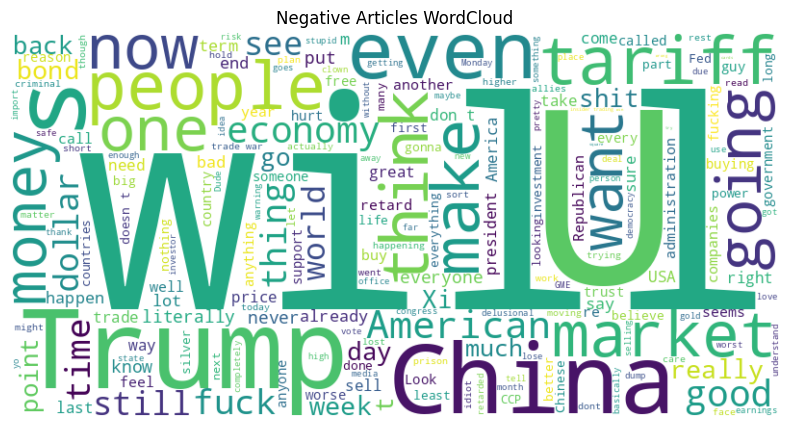

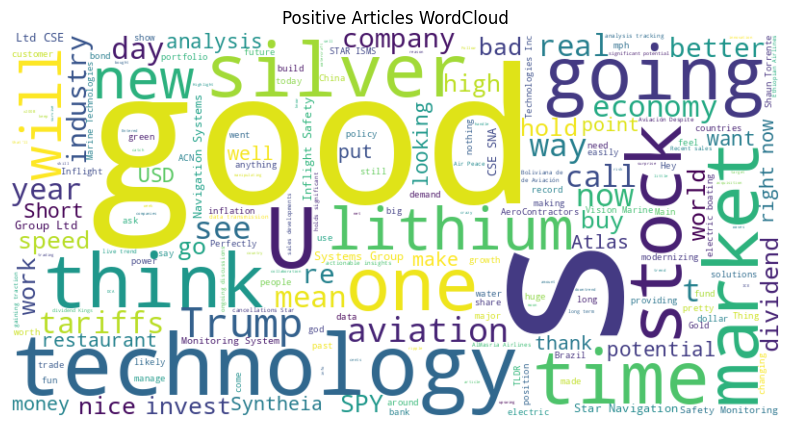

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for label, title in zip([-1.0, 1.0], ["Negative", "Positive"]):
    text_all = " ".join(df[df['label'] == label]['text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_all)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{title} Articles WordCloud")
    plt.show()

#explainations of the figure
#(1)The upper part shows the most frequent words in negative articles.
#For example: will, Trump, want, China, fuck, shit, dollar, tariff, money, people.
#There are clearly more negative words (such as "fuck" and "shit") as well as references to political and economic events (such as "Trump," "China," and "tariff").
#This reflects users’ dissatisfaction and criticism towards political, economic issues and the overall investment environment.

#(2)The lower part shows the most frequent words in positive articles.
#For example: goods, market, technology, think, one, silver, lithium, aviation.
#Keywords are mainly related to products, technology, industries, and positive outlooks.
#The focus is on investment opportunities, positive news, or optimistic discussions about industry development.

#From the above, it is clear that negative and positive articles focus on distinctly different topics.

/tmp/ipython-input-3143172714.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




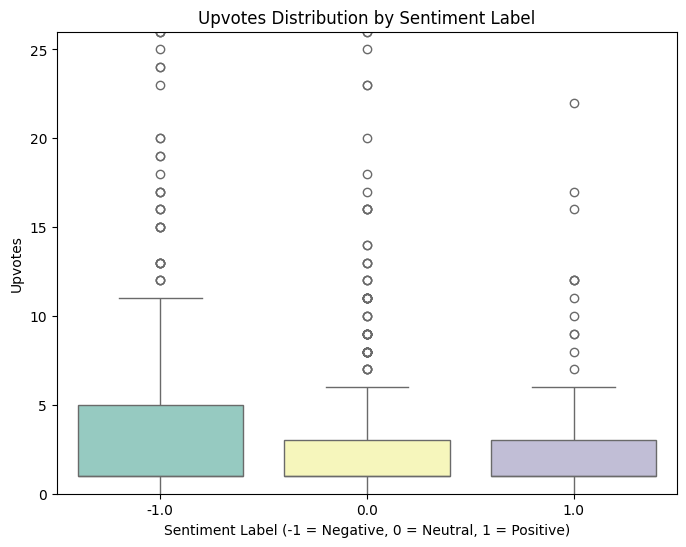

/tmp/ipython-input-3143172714.py:12: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.


/tmp/ipython-input-3143172714.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




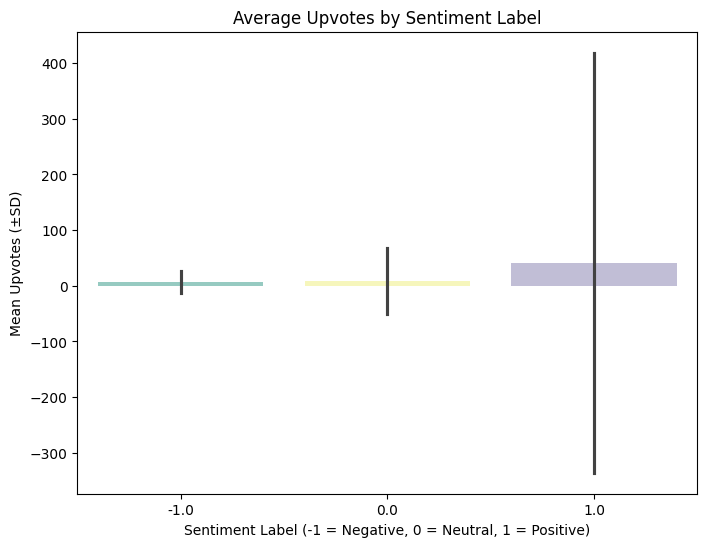

In [17]:
#若有缺值要先補上0
df['upvotes'] = pd.to_numeric(df['upvotes'], errors="coerce").fillna(0)

plt.figure(figsize=(8,6))
sns.boxplot(x='label', y='upvotes', data=df, palette="Set3")
plt.ylim(0, df['upvotes'].quantile(0.95))  #去掉極端值
plt.title("Upvotes Distribution by Sentiment Label")
plt.xlabel("Sentiment Label (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Upvotes")
plt.show()
plt.figure(figsize=(8,6))
sns.barplot(x='label', y='upvotes', data=df, palette="Set3", estimator=np.mean, ci="sd")
plt.title("Average Upvotes by Sentiment Label")
plt.xlabel("Sentiment Label (-1 = Negative, 0 = Neutral, 1 = Positive)")
plt.ylabel("Mean Upvotes (±SD)")
plt.show()

#explainations of the figure
#The results show that negative articles often receive more upvotes, suggesting that criticism or complaints resonate more strongly with readers.

#Positive articles generally have low engagement, but occasionally a viral post appears, which raises the average due to extreme values.

#Neutral articles have the lowest engagement, indicating that posts lacking emotional tone are less likely to attract responses from readers.

/tmp/ipython-input-111330964.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




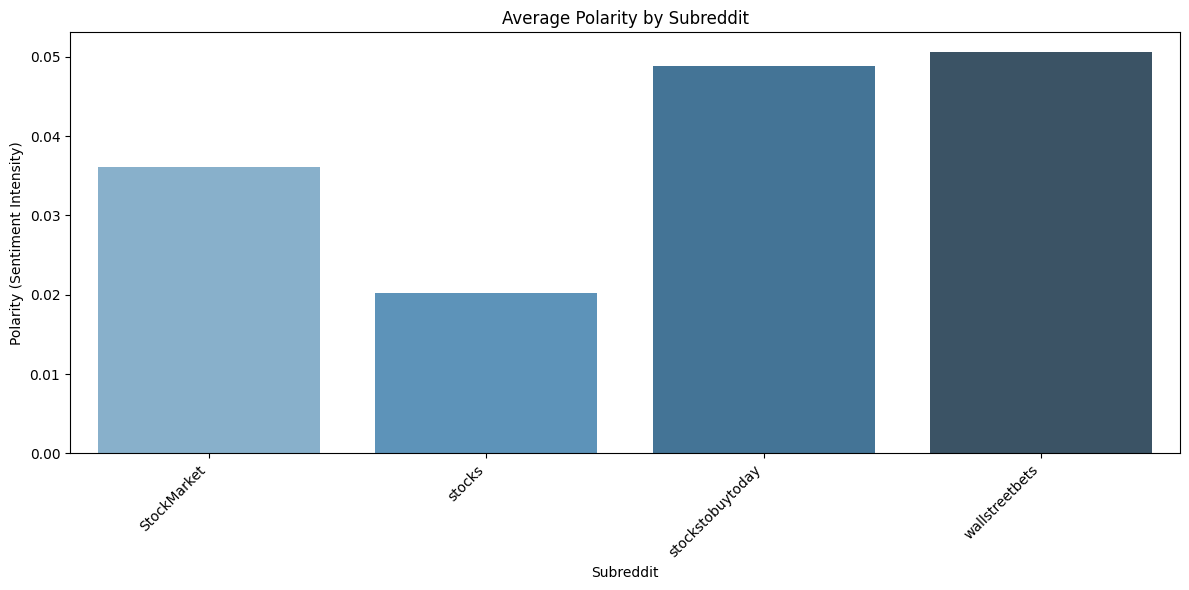

/tmp/ipython-input-111330964.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




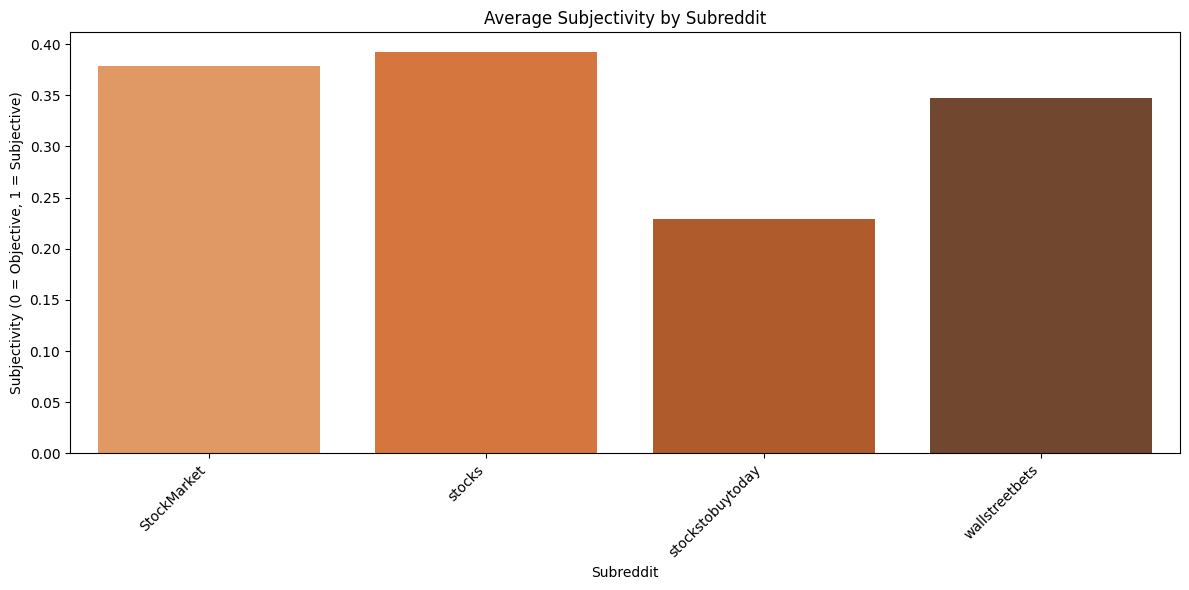

In [18]:
df['polarity'] = pd.to_numeric(df['polarity'], errors="coerce")
df['subjectivity'] = pd.to_numeric(df['subjectivity'], errors="coerce")

#平均polarity / subjectivity
agg_stats = df.groupby("subreddit")[["polarity", "subjectivity"]].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="subreddit", y="polarity", data=agg_stats, palette="Blues_d")
plt.xticks(rotation=45, ha="right")
plt.title("Average Polarity by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Polarity (Sentiment Intensity)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="subreddit", y="subjectivity", data=agg_stats, palette="Oranges_d")
plt.xticks(rotation=45, ha="right")
plt.title("Average Subjectivity by Subreddit")
plt.xlabel("Subreddit")
plt.ylabel("Subjectivity (0 = Objective, 1 = Subjective)")
plt.tight_layout()
plt.show()

#explainations of the figure
#(1)The stocksbybuytoday board tends to be “rationally optimistic,” showing the highest sentiment polarity but the lowest subjectivity,
#indicating that posts are mainly based on data or recommendations.

#(2)stocks and StockMarket exhibit weaker sentiment but the highest subjectivity, suggesting that the posts are more inclined toward personal opinions and subjective views.

#(3)wallstreetbets overall shows a positive sentiment, but with medium subjectivity, reflecting its unique culture of being “playful yet positive.”


=== BASIC INFO ===
Shape : (847, 8)
Columns: {'type': dtype('O'), 'subreddit': dtype('O'), 'upvotes': dtype('int64'), 'text': dtype('O'), 'subjectivity': dtype('float64'), 'polarity': dtype('float64'), 'sentiment': dtype('float64'), 'label': dtype('float64')}
      type       subreddit  upvotes  \
0  comment  wallstreetbets        0   
1  comment  wallstreetbets      -15   
2  comment     StockMarket        1   

                                                text  subjectivity  polarity  \
0                                   Calls on retards      1.000000 -0.900000   
1  Stunt as in like why did they even make a big ...      0.177778  0.083333   
2                  Seeing lots of red in the ticker.      0.000000  0.000000   

   sentiment  label  
0       -1.0   -1.0  
1        1.0    0.0  
2        0.0    0.0   

=== MISSING VALUES (per column) ===
type            0
subreddit       0
upvotes         0
text            0
subjectivity    0
polarity        0
sentiment       0
label    

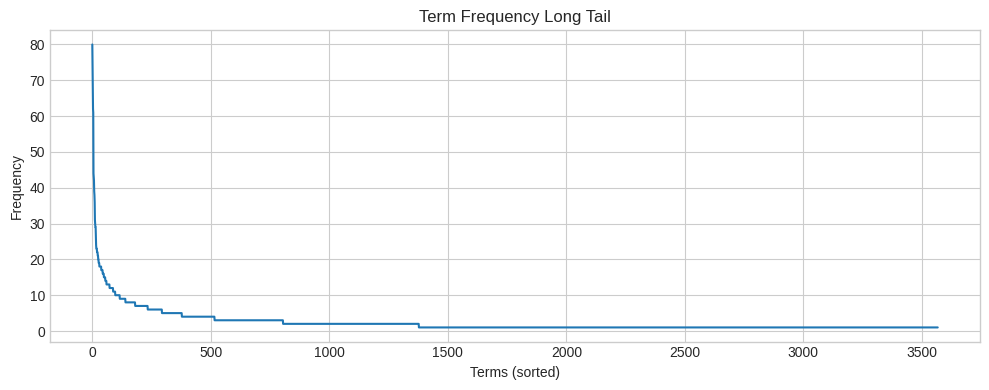

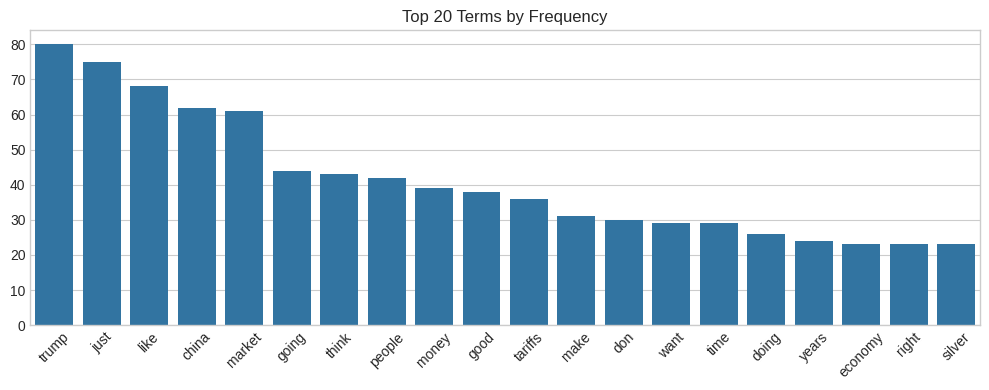

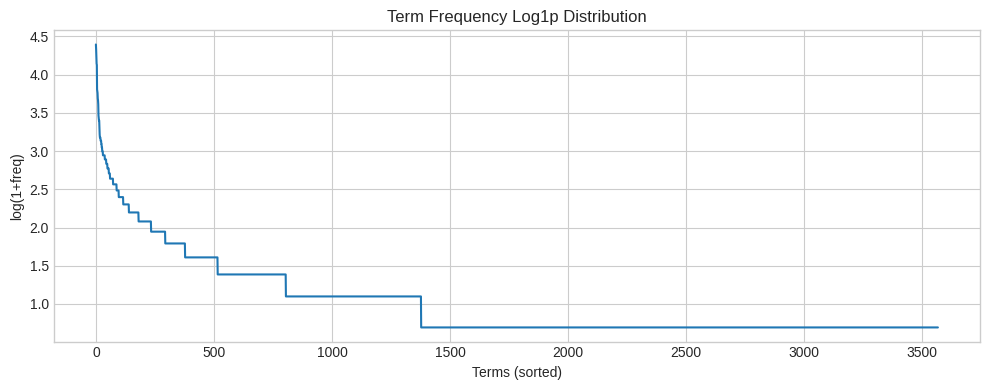

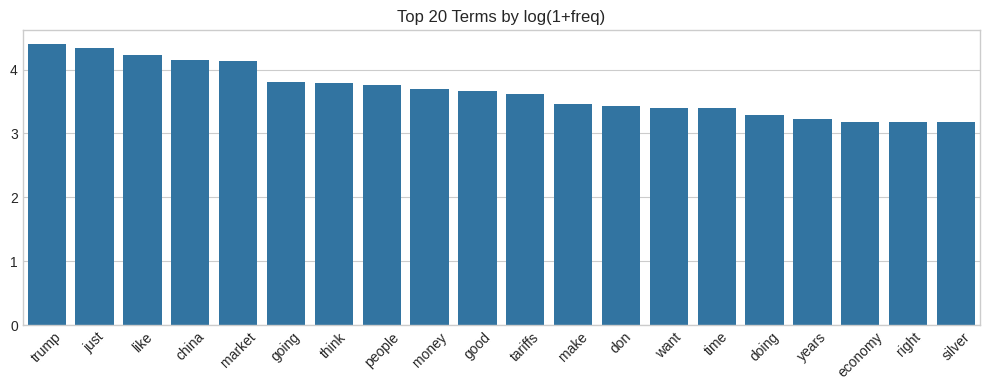


=== PHASE 1 COMPLETE ===


In [19]:
#顯示其他有關資料的資訊
# ======================================

import os, re, math, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore")
plt.style.use("seaborn-v0_8-whitegrid")

# -------------------------------
# 1. Data Source
# -------------------------------
CSV_PATH = "/content/Reddit-stock-sentiment.csv"      # 修改路徑即可
df_raw = pd.read_csv(CSV_PATH, encoding="utf-8", low_memory=False)

# -------------------------------
# 2. Data Preparation
# -------------------------------
cols_keep = [
    "type", "subreddit", "upvotes",
    "text", "subjectivity", "polarity",
    "sentiment", "label"
]
df = df_raw[cols_keep].copy()

# cast numeric columns
df["upvotes"]      = pd.to_numeric(df["upvotes"], errors="coerce")
df["subjectivity"] = pd.to_numeric(df["subjectivity"], errors="coerce")
df["polarity"]     = pd.to_numeric(df["polarity"], errors="coerce")
df["sentiment"]    = pd.to_numeric(df["sentiment"], errors="coerce")
df["label"]        = pd.to_numeric(df["label"], errors="coerce")

# -------------------------------
# 3. Data Transformation
# -------------------------------
print("\n=== BASIC INFO ===")
print("Shape :", df.shape)
print("Columns:", df.dtypes.to_dict())
print(df.head(3), "\n")

# -------------------------------
# 4. Data Mining with Pandas
# -------------------------------
print("=== MISSING VALUES (per column) ===")
missing_col = df.isnull().sum()
print(missing_col, "\n")

df.dropna(subset=["text", "label"], inplace=True)

df["upvotes"].fillna(0, inplace=True)
for col in ["subjectivity", "polarity", "sentiment"]:
    df[col].fillna(df[col].median(), inplace=True)

# 4.2 Duplicate records
dup_cnt = df.duplicated().sum()
print(f"Duplicates found: {dup_cnt}")
df.drop_duplicates(inplace=True)

# -------------------------------
# 5. Data Pre-processing
# -------------------------------
df_sample = df.sample(frac=0.80, random_state=42).reset_index(drop=True)

# 5.2 Feature Creation
df_sample["text_len"] = df_sample["text"].str.len()

TOKEN_PATTERN = r"\b\w+\b"
df_sample["unigrams"] = df_sample["text"].apply(
    lambda x: re.findall(TOKEN_PATTERN, str(x).lower())
)

## 5.2.3 Upvote ratio
max_up = df_sample["upvotes"].max()
df_sample["upvote_ratio"] = df_sample["upvotes"] / max_up

print("\n=== SAMPLE OVERVIEW ===")
print(df_sample.head(2)[["type","subreddit","upvotes","text_len","label"]])

# 5.3 Feature Subset Selection – CountVectorizer
vect = CountVectorizer(stop_words="english")
X_counts = vect.fit_transform(df_sample["text"])
print("\nVocab size :", len(vect.get_feature_names_out()))
print("Doc count  :", X_counts.shape[0])

# 5.4 Attribute Transformation / Aggregation
term_freq = np.asarray(X_counts.sum(axis=0)).ravel()
order = term_freq.argsort()[::-1]
terms_sorted = vect.get_feature_names_out()[order]
freq_sorted  = term_freq[order]
freq_log     = np.log1p(freq_sorted)

# -- Plot 1: Long-tail raw frequency
plt.figure(figsize=(10,4))
plt.plot(freq_sorted)
plt.title("Term Frequency Long Tail")
plt.xlabel("Terms (sorted)"); plt.ylabel("Frequency")
plt.tight_layout(); plt.show()

# -- Plot 2: Top-20 raw frequency
N = 20
plt.figure(figsize=(10,4))
sns.barplot(x=terms_sorted[:N], y=freq_sorted[:N])
plt.title(f"Top {N} Terms by Frequency")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# -- Plot 3: Log-scaled distribution
plt.figure(figsize=(10,4))
plt.plot(freq_log)
plt.title("Term Frequency Log1p Distribution")
plt.xlabel("Terms (sorted)"); plt.ylabel("log(1+freq)")
plt.tight_layout(); plt.show()

# -- Plot 4: Top-20 log frequency
plt.figure(figsize=(10,4))
sns.barplot(x=terms_sorted[:N], y=freq_log[:N])
plt.title(f"Top {N} Terms by log(1+freq)")
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

print("\n=== PHASE 1 COMPLETE ===")


# Phase 2

由於下方有較多段落會跑出warning，因此在這邊執行這行讓colab不要提示任何warning，若後面仍有warning跑出來可以再執行一次，通常會解決。

Since the following sections will produce many warnings, we execute this line here to prevent Colab from displaying any warning
messages.If warnings still appear later, you can run it again，it usually resolves the issue.

In [28]:
### Begin Assignment Here
import warnings
for category in [DeprecationWarning, FutureWarning, UserWarning, RuntimeWarning]:
    warnings.filterwarnings("ignore", category=category)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning:

datetime.datetime.utcnow() is deprecated and scheduled for removal in a future v

共有 3619 個不同詞彙
最高頻前 10 詞：
       word  freq
7         s   246
113       t   120
367  market    89
97     just    75
277   trump    75
21     like    70
343   china    61
255   think    43
130   going    42
639   stock    38


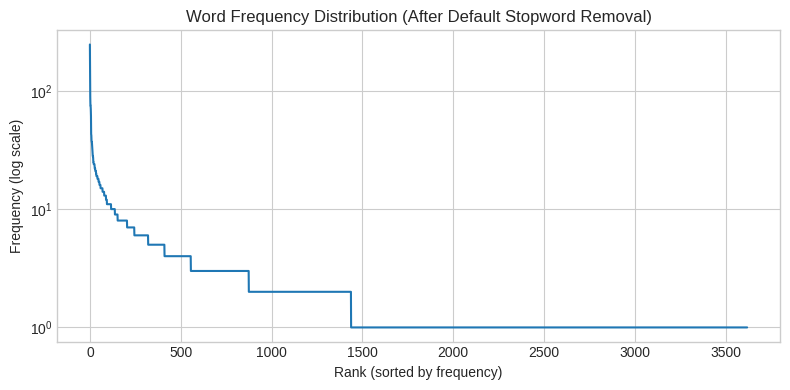

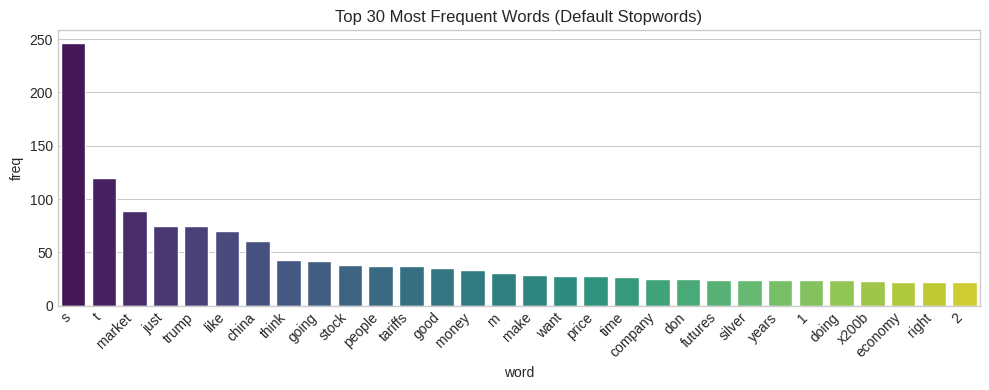

least 1%：16.15%
top 5%：34.11%


In [29]:
import re
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

plt.style.use("seaborn-v0_8-whitegrid")

#remove stop word
def tokenize_and_filter(text):
    tokens = re.findall(r"\b\w+\b", str(text).lower())
    return [w for w in tokens if w not in ENGLISH_STOP_WORDS]

df_sample["unigrams_filtered"] = df_sample["text"].apply(tokenize_and_filter)

#word frequency
all_words = [w for unigrams in df_sample["unigrams_filtered"] for w in unigrams]
word_counts = Counter(all_words)
df_wordfreq = pd.DataFrame(word_counts.items(), columns=["word", "freq"]).sort_values("freq", ascending=False)

print(f"共有 {len(df_wordfreq)} 個不同詞彙")
print("最高頻前 10 詞：")
print(df_wordfreq.head(10))

#long tail plot
plt.figure(figsize=(8,4))
plt.plot(df_wordfreq["freq"].values)
plt.yscale("log")
plt.title("Word Frequency Distribution (After Default Stopword Removal)")
plt.xlabel("Rank (sorted by frequency)")
plt.ylabel("Frequency (log scale)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x="word", y="freq", data=df_wordfreq.head(30), palette="viridis")
plt.title("Top 30 Most Frequent Words (Default Stopwords)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


top_1pct_cut = int(len(df_wordfreq) * 0.01)
top_5pct_cut = int(len(df_wordfreq) * 0.05)

top1_ratio = df_wordfreq["freq"][:top_1pct_cut].sum() / df_wordfreq["freq"].sum() * 100
top5_ratio = df_wordfreq["freq"][:top_5pct_cut].sum() / df_wordfreq["freq"].sum() * 100

print(f"least 1%：{top1_ratio:.2f}%")
print(f"top 5%：{top5_ratio:.2f}%")

#check the least 1%
bottom_1pct_cut = int(len(df_wordfreq) * 0.01)
bottom_words = df_wordfreq.tail(bottom_1pct_cut)

Since the implementation showed that removing high-frequency words left too few remaining terms, only a few erroneous high-frequency words (such as “s” and “t”) were manually removed here.
In addition, stopwords and the bottom 1% of the least frequent words were also deleted.

第一篇分詞結果： []


,support,itemsets,length
203,0.019174,"(china, tariffs)",2
219,0.017699,"(just, trump)",2
223,0.017699,"(stock, market)",2
202,0.016224,"(china, market)",2
211,0.016224,"(like, just)",2
221,0.014749,"(like, new)",2
227,0.014749,"(xi, trump)",2
201,0.013274,"(just, china)",2
205,0.013274,"(china, trump)",2
209,0.013274,"(think, going)",2


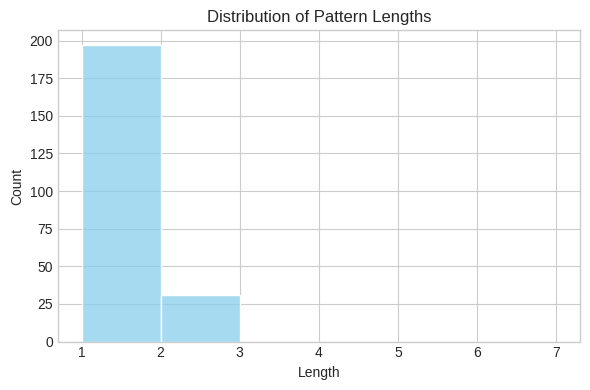

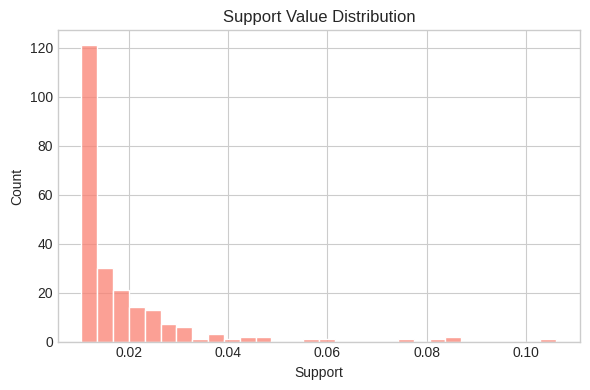


手動移除雜訊詞：{'s', 't', 'img', 'emote', 'amp'}
最低 1% 詞數：36，過濾後保留詞數：3577
最低 1% 詞:
[np.str_('steam'), np.str_('historically'), np.str_('1953'), np.str_('conquer'), np.str_('toilets'), np.str_('1969'), np.str_('extention'), np.str_('globe'), np.str_('mandate'), np.str_('fleecing')]


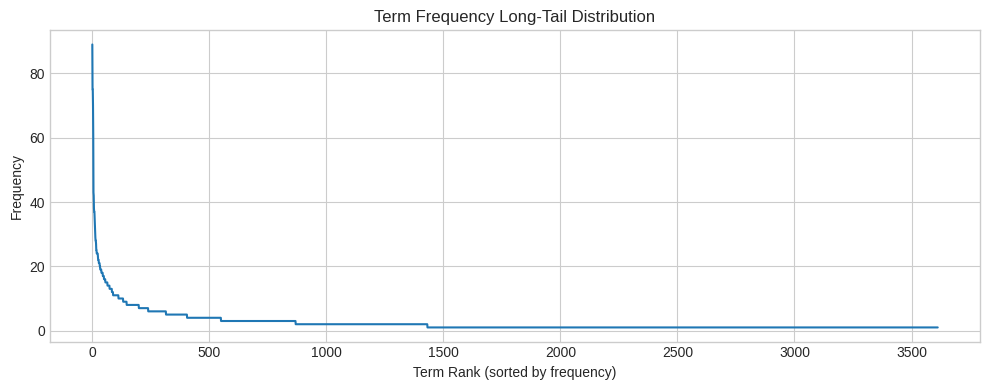

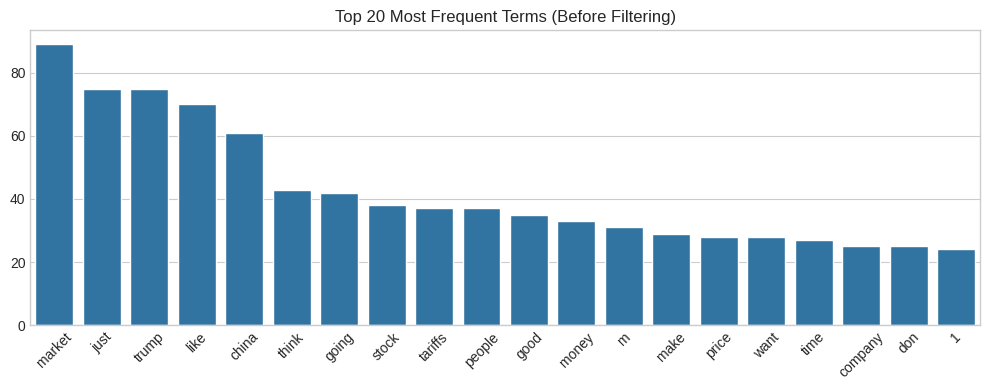

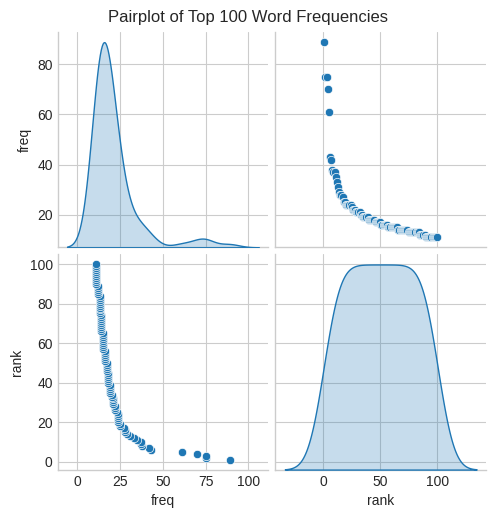


Count 特徵矩陣形狀： (678, 3550)
TF-IDF 特徵矩陣形狀： (678, 3550)


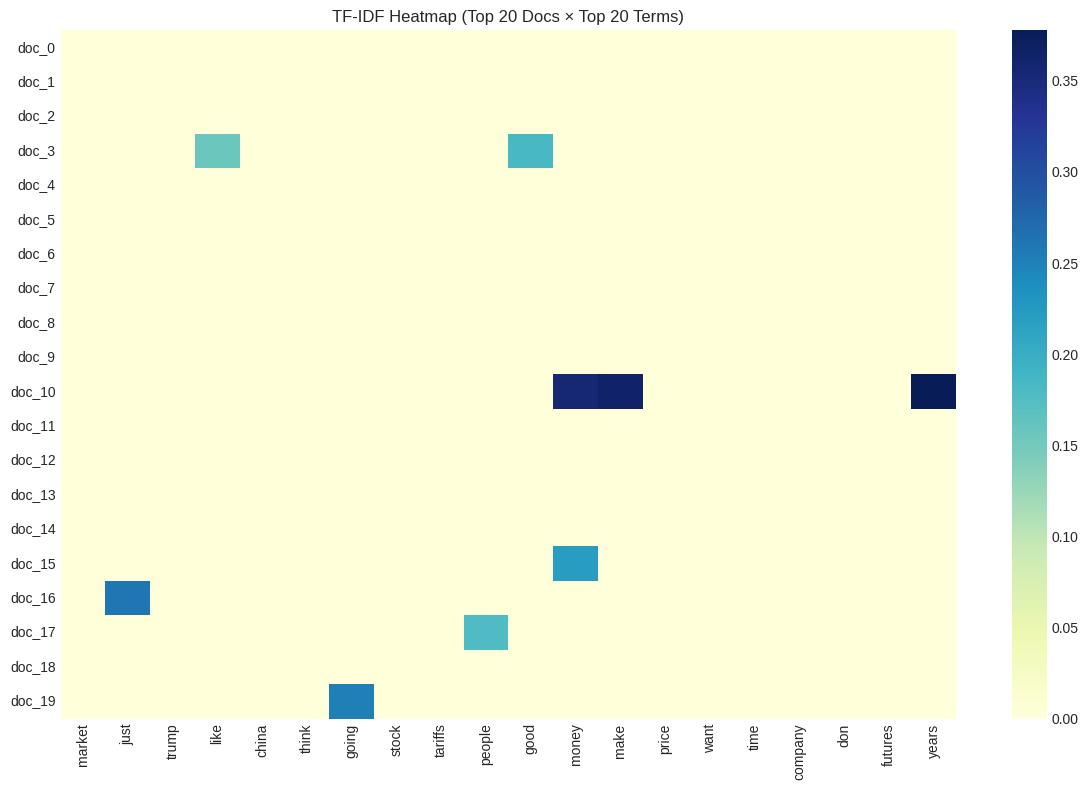


Doc 0 Top TF-IDF Terms:
  00              0.0000
  zsil            0.0000
  zgld            0.0000
  zero            0.0000
  yup             0.0000
  yoyo            0.0000
  young           0.0000
  yo              0.0000
  yippee          0.0000
  yikes           0.0000

Doc 1 Top TF-IDF Terms:
  chicken         1.0000
  explain         0.0000
  expire          0.0000
  expert          0.0000
  experienced     0.0000
  experience      0.0000
  expensive       0.0000
  expecting       0.0000
  expectations    0.0000
  expectation     0.0000


In [30]:
# ==========================================================
#Tokenization、Stopword Filtering
#Frequent Pattern Mining (Apriori)
#Word Frequency Distribution、Filtering、Pairplot
#CountVectorizer、TF-IDF、Heatmap
# ==========================================================

import warnings, re
warnings.filterwarnings("ignore", category=DeprecationWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, CountVectorizer, TfidfVectorizer

plt.style.use("seaborn-v0_8-whitegrid")


df = pd.read_csv("/content/Reddit-stock-sentiment.csv")


df_sample = df.sample(frac=0.8, random_state=42).reset_index(drop=True)


# ==========================================================
# Step 1: Tokenization、Stopword Filtering
# ==========================================================
custom_stopwords = set(ENGLISH_STOP_WORDS).union(
    {"t", "s", "amp", "img", "emote", "https", "com", "www", "reddit"}
)

def tokenize_and_filter(text):
    tokens = re.findall(r"\b\w+\b", str(text).lower())
    return [w for w in tokens if w not in custom_stopwords]

df_sample["unigrams_filtered"] = df_sample["text"].apply(tokenize_and_filter)

avg_tokens = df_sample["unigrams_filtered"].apply(len).mean()
print("第一篇分詞結果：", df_sample["unigrams_filtered"].iloc[0][:15])

#transaction
transactions = df_sample["unigrams_filtered"].tolist()
with open("transactions_phase2.txt", "w", encoding="utf-8") as f:
    for tokens in transactions:
        f.write(" ".join(tokens) + "\n")

# ==========================================================
# Step 2: Frequent Pattern Mining (Apriori)
# ==========================================================
!pip install mlxtend -q
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_tx = pd.DataFrame(te_ary, columns=te.columns_)

freq_items = apriori(df_tx, min_support=0.01, use_colnames=True)
freq_items["length"] = freq_items["itemsets"].apply(len)
freq_items = freq_items.sort_values(["length", "support"], ascending=[False, False])

display(freq_items[freq_items["length"] >= 2].head(10))

#length of pattern
plt.figure(figsize=(6,4))
sns.histplot(freq_items["length"], bins=range(1,8), color="skyblue")
plt.title("Distribution of Pattern Lengths")
plt.xlabel("Length"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(freq_items["support"], bins=30, color="salmon")
plt.title("Support Value Distribution")
plt.xlabel("Support"); plt.ylabel("Count")
plt.tight_layout()
plt.show()

# ==========================================================
# Step 3: Word Frequency Distribution、Filtering、Pairplot
# ==========================================================
all_words = [w for unigrams in df_sample["unigrams_filtered"] for w in unigrams]
word_counts = Counter(all_words)
unique_words = np.array(list(word_counts.keys()))
word_freq = np.array([word_counts[w] for w in unique_words])

sorted_idx = np.argsort(word_freq)[::-1]
sorted_words, sorted_freq = unique_words[sorted_idx], word_freq[sorted_idx]

#remove least 1% word and sotp word and some noise i noticed
manual_highfreq_stopwords = {"s", "t", "amp", "img", "emote"}
bottom_1pct = int(len(sorted_words) * 0.01)
lowfreq_words = set(sorted_words[-bottom_1pct:])
filtered_set = set(sorted_words) - manual_highfreq_stopwords - lowfreq_words

print(f"\n手動移除雜訊詞：{manual_highfreq_stopwords}")
print(f"最低 1% 詞數：{len(lowfreq_words)}，過濾後保留詞數：{len(filtered_set)}")
print("最低 1% 詞:")
print(list(lowfreq_words)[:10])

#visualization
plt.figure(figsize=(10,4))
plt.plot(sorted_freq)
plt.title("Term Frequency Long-Tail Distribution")
plt.xlabel("Term Rank (sorted by frequency)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=sorted_words[:20], y=sorted_freq[:20])
plt.xticks(rotation=45)
plt.title("Top 20 Most Frequent Terms (Before Filtering)")
plt.tight_layout()
plt.show()

#Pairplot
freq_df = pd.DataFrame({"word": sorted_words[:100], "freq": sorted_freq[:100]})
freq_df["rank"] = np.arange(1, 101)

sns.pairplot(freq_df, diag_kind="kde")
plt.suptitle("Pairplot of Top 100 Word Frequencies", y=1.02)
plt.show()

# ==========================================================
# Step 4: CountVectorizer、TF-IDF、Heatmap
# ==========================================================
df_sample["unigrams_final"] = df_sample["unigrams_filtered"].apply(
    lambda ws: [w for w in ws if w in filtered_set]
)
final_corpus = [" ".join(ws) for ws in df_sample["unigrams_final"]]

count_vect = CountVectorizer()
X_counts_final = count_vect.fit_transform(final_corpus)
print("\nCount 特徵矩陣形狀：", X_counts_final.shape)

tfidf_vect = TfidfVectorizer(vocabulary=count_vect.get_feature_names_out())
X_tfidf_final = tfidf_vect.fit_transform(final_corpus)
print("TF-IDF 特徵矩陣形狀：", X_tfidf_final.shape)

#Heatmap of TF-IDF
top_n_docs, top_n_terms = 20, 20
term_frequencies = np.asarray(X_counts_final.sum(axis=0)).ravel()
top_idx = term_frequencies.argsort()[::-1][:top_n_terms]
top_terms = count_vect.get_feature_names_out()[top_idx]

tfidf_subset = X_tfidf_final[:top_n_docs, top_idx].toarray()
df_heatmap = pd.DataFrame(tfidf_subset, columns=top_terms, index=[f"doc_{i}" for i in range(top_n_docs)])

plt.figure(figsize=(12,8))
sns.heatmap(df_heatmap, cmap="YlGnBu")
plt.title("TF-IDF Heatmap (Top 20 Docs × Top 20 Terms)")
plt.tight_layout()
plt.show()

for i in range(2):
    row = X_tfidf_final[i].toarray().ravel()
    top_idx = row.argsort()[::-1][:10]
    print(f"\nDoc {i} Top TF-IDF Terms:")
    for t, v in zip(tfidf_vect.get_feature_names_out()[top_idx], row[top_idx]):
        print(f"  {t:<15} {v:.4f}")

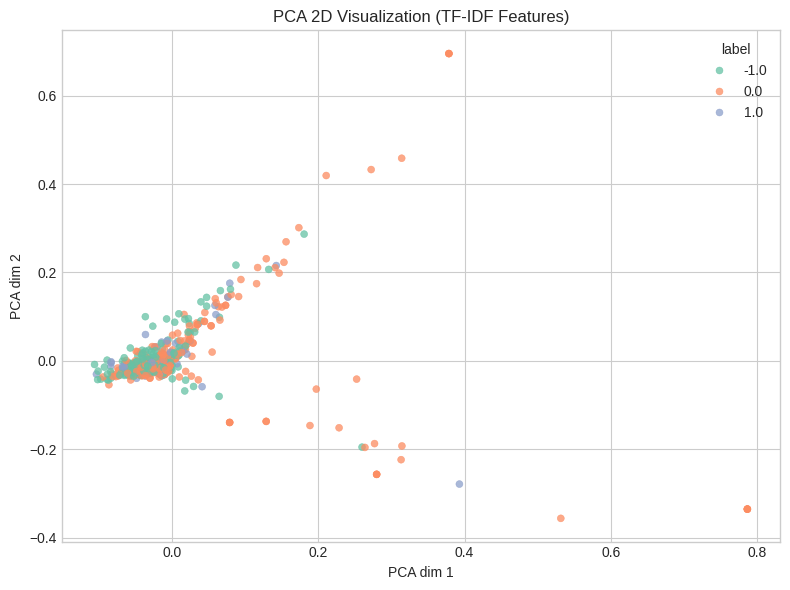

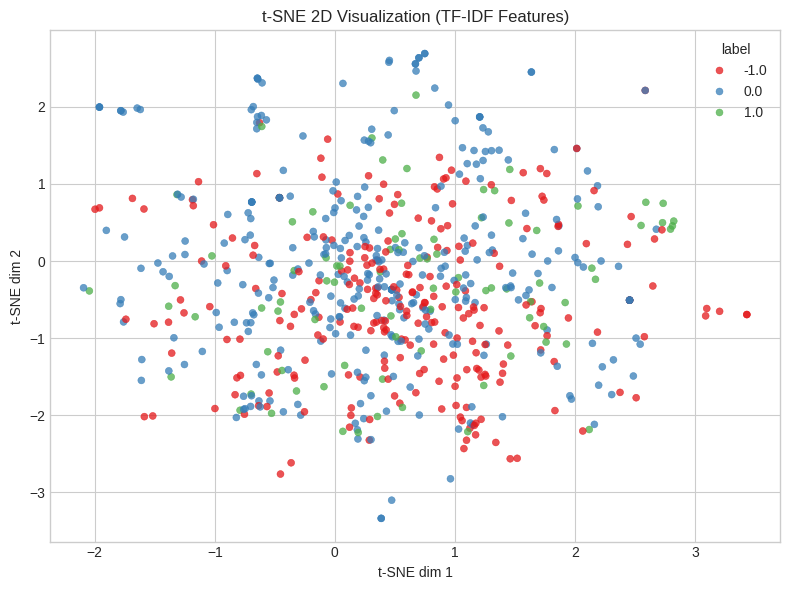

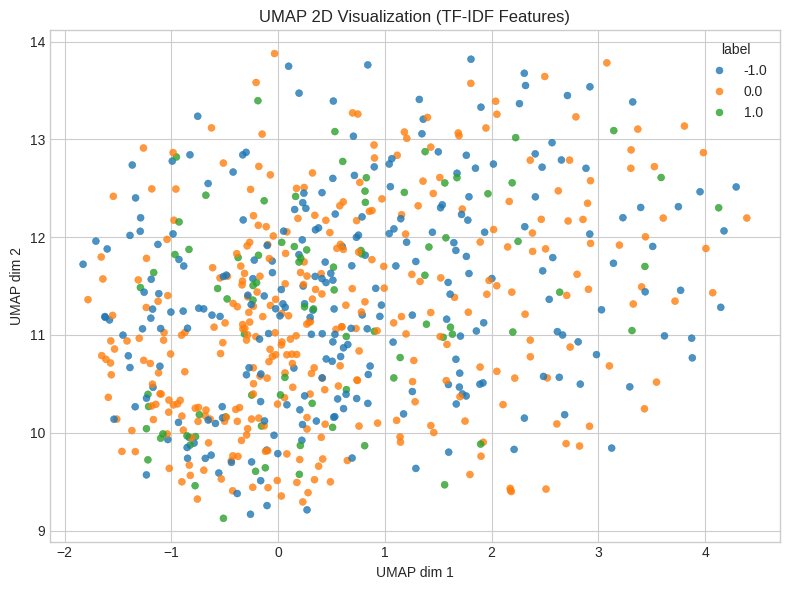

In [31]:
# ==========================================================
#（PCA / t-SNE / UMAP）
# ==========================================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_sample['target'] = df_sample['label']

#only use 1000
n_sample = min(1000, X_tfidf_final.shape[0])
X_for_vis = X_tfidf_final[:n_sample]
y_for_vis = np.array(df_sample['target'].iloc[:n_sample])

# ----------------------------------------------------------
#PCA
# ----------------------------------------------------------
from sklearn.decomposition import PCA

X_pca = PCA(n_components=2, random_state=42).fit_transform(X_for_vis.toarray())
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y_for_vis, palette="Set2", alpha=0.75, s=25, edgecolor=None)
plt.title("PCA 2D Visualization (TF-IDF Features)")
plt.xlabel("PCA dim 1"); plt.ylabel("PCA dim 2")
plt.legend(title="label", loc="best")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
#t-SNE
# ----------------------------------------------------------
from sklearn.manifold import TSNE

X_tsne = TSNE(
    n_components=2, perplexity=30, learning_rate='auto',
    init='random', random_state=42, n_iter=1000
).fit_transform(X_for_vis.toarray())

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_for_vis, palette="Set1", alpha=0.75, s=25, edgecolor=None)
plt.title("t-SNE 2D Visualization (TF-IDF Features)")
plt.xlabel("t-SNE dim 1"); plt.ylabel("t-SNE dim 2")
plt.legend(title="label", loc="best")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
#UMAP
# ----------------------------------------------------------
!pip -q install umap-learn
import umap.umap_ as umap

umap_model = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = umap_model.fit_transform(X_for_vis)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_umap[:,0], y=X_umap[:,1], hue=y_for_vis, palette="tab10", alpha=0.8, s=25, edgecolor=None)
plt.title("UMAP 2D Visualization (TF-IDF Features)")
plt.xlabel("UMAP dim 1"); plt.ylabel("UMAP dim 2")
plt.legend(title="label", loc="best")
plt.tight_layout()
plt.show()

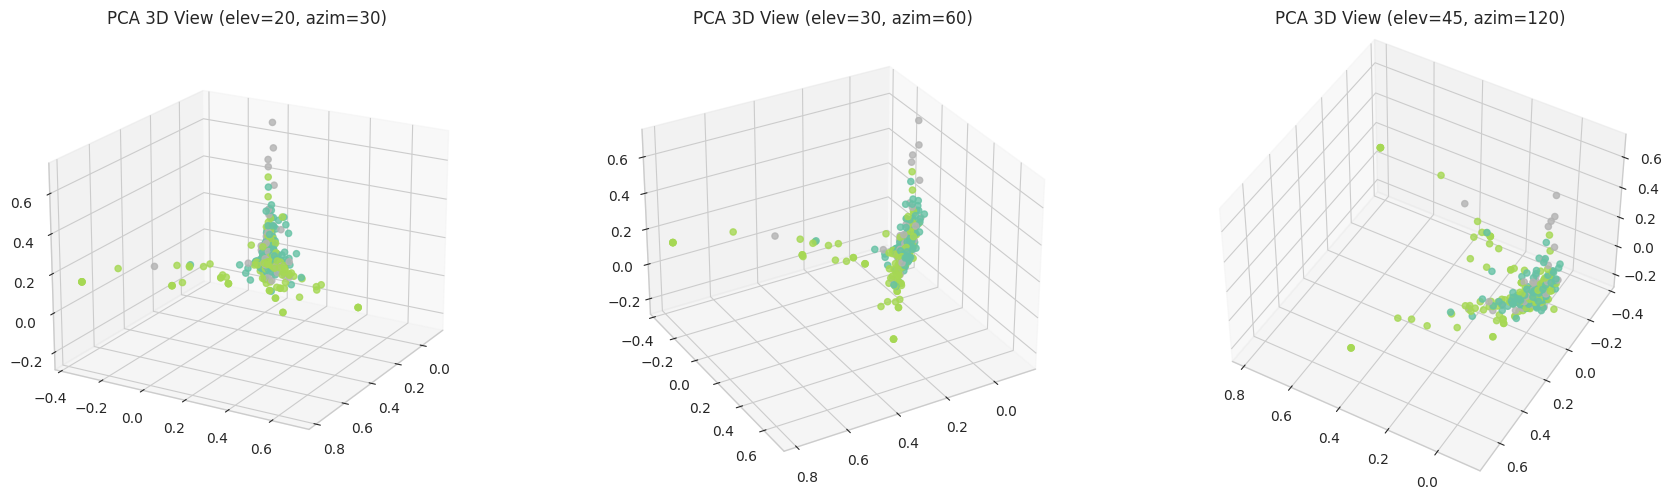

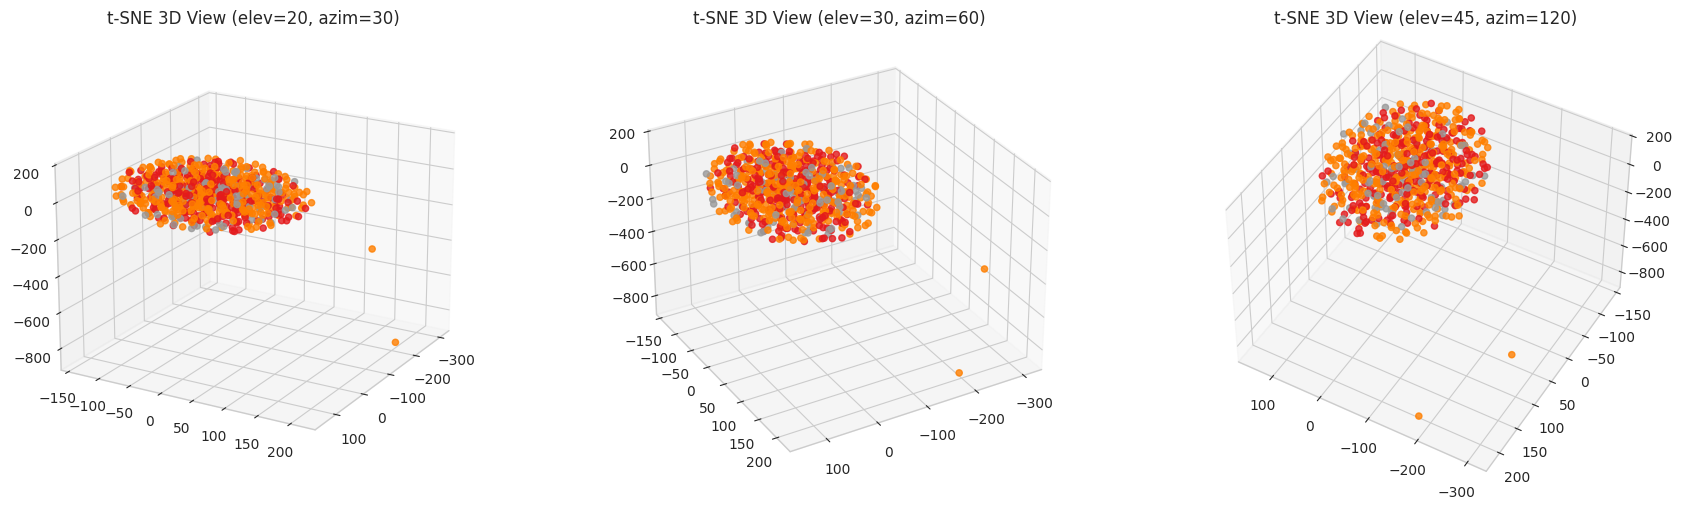

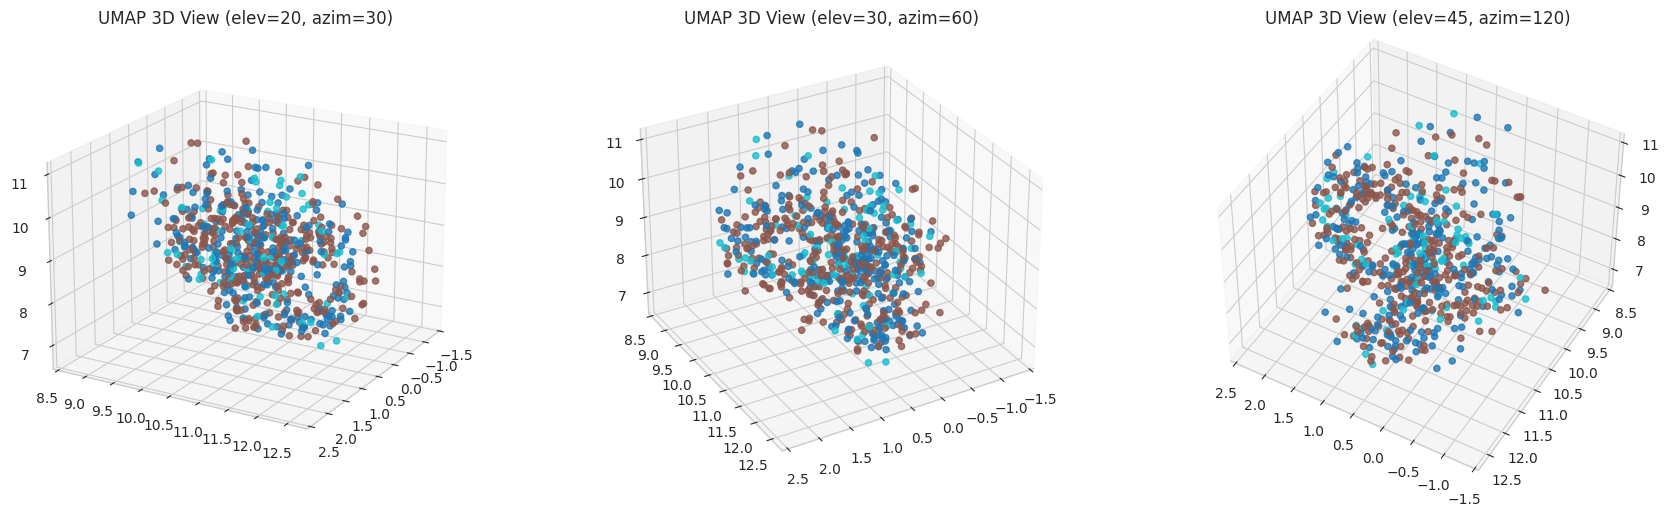

In [32]:
# ==========================================================
#3D（PCA / t-SNE / UMAP）

# ==========================================================

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")


df_sample['target'] = df_sample['label']


y_for_vis = np.array(df_sample['target'].iloc[:n_sample])

# ==========================================================
#PCA (3D)
# ==========================================================
pca_3d = PCA(n_components=3, random_state=42)
X_pca_3d = pca_3d.fit_transform(X_for_vis.toarray())

fig = plt.figure(figsize=(18,5))
angles = [(20,30), (30,60), (45,120)]
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(X_pca_3d[:,0], X_pca_3d[:,1], X_pca_3d[:,2],
                    c=y_for_vis, cmap='Set2', s=20, alpha=0.8)
    ax.set_title(f"PCA 3D View (elev={elev}, azim={azim})")
    ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
plt.show()

# ==========================================================
#t-SNE (3D)
# ==========================================================
tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42, init='random', n_iter=1500)
X_tsne_3d = tsne_3d.fit_transform(X_for_vis.toarray())

fig = plt.figure(figsize=(18,5))
angles = [(20,30), (30,60), (45,120)]
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(X_tsne_3d[:,0], X_tsne_3d[:,1], X_tsne_3d[:,2],
                    c=y_for_vis, cmap='Set1', s=20, alpha=0.8)
    ax.set_title(f"t-SNE 3D View (elev={elev}, azim={azim})")
    ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
plt.show()

# ==========================================================
#UMAP (3D)
# ==========================================================
umap_model_3d = umap.UMAP(n_components=3, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap_3d = umap_model_3d.fit_transform(X_for_vis)

fig = plt.figure(figsize=(18,5))
angles = [(20,30), (30,60), (45,120)]
for i, (elev, azim) in enumerate(angles, 1):
    ax = fig.add_subplot(1, 3, i, projection='3d')
    sc = ax.scatter(X_umap_3d[:,0], X_umap_3d[:,1], X_umap_3d[:,2],
                    c=y_for_vis, cmap='tab10', s=20, alpha=0.8)
    ax.set_title(f"UMAP 3D View (elev={elev}, azim={azim})")
    ax.view_init(elev=elev, azim=azim)
plt.tight_layout()
plt.show()

This experiment compares three setups:

CountVectorizer + MultinomialNB

TF-IDF Vectorizer + ComplementNB

TF-IDF Vectorizer + Frequent Pattern Augmentation

① Count + MultinomialNB

Accuracy = 0.5588

The confusion matrix shows most samples predicted as label 0 or –1, while label 1 (positive) has very low recall (0.167).

Pros: Simple baseline that captures raw term frequency.

Cons: High-frequency words dominate the model, biasing predictions toward majority classes.

② TF-IDF + ComplementNB

Accuracy = 0.5661 (↑ slightly higher)

ComplementNB is more robust for imbalanced datasets since it adjusts for class-specific term distributions.

The confusion matrix shows better stability for labels –1 and 0, though label 1 remains challenging.

Conclusion: TF-IDF weights rare yet informative words more heavily, improving overall performance.

③ TF-IDF + Frequent Pattern Augmentation

Accuracy = 0.5515 (↓ slightly worse)

Although adding frequent word-pair patterns theoretically enriches semantic context, the improvement is minimal.

Likely reasons:

Added n-gram-like patterns introduce noise.

Reddit posts have diverse phrasing; frequent co-occurrence patterns may not correlate strongly with sentiment.

===== CountVectorizer + MultinomialNB =====
              precision    recall  f1-score   support

        -1.0      0.486     0.667     0.562        51
         0.0      0.629     0.582     0.605        67
         1.0      0.750     0.167     0.273        18

    accuracy                          0.559       136
   macro avg      0.622     0.472     0.480       136
weighted avg      0.591     0.559     0.545       136

Accuracy: 0.5588235294117647

===== TF-IDF + ComplementNB =====
              precision    recall  f1-score   support

        -1.0      0.533     0.784     0.635        51
         0.0      0.681     0.478     0.561        67
         1.0      0.357     0.278     0.312        18

    accuracy                          0.566       136
   macro avg      0.524     0.513     0.503       136
weighted avg      0.583     0.566     0.556       136

Accuracy: 0.5661764705882353


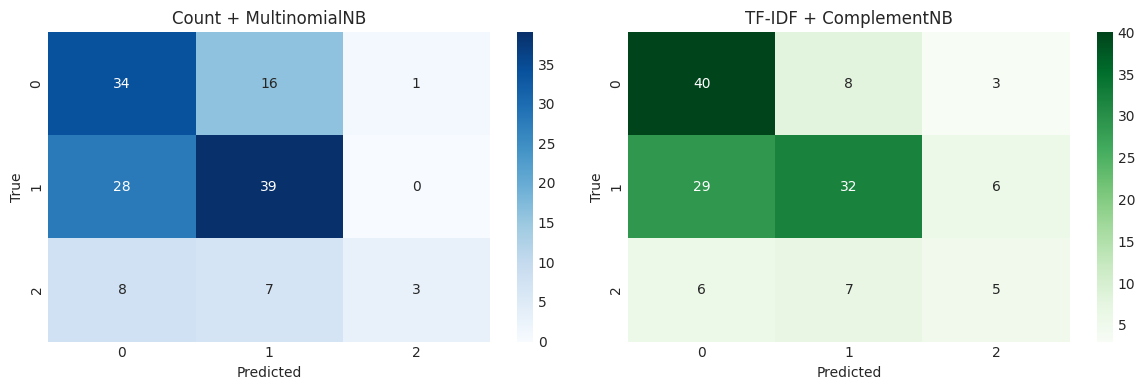


===== Step 9 : Frequent Pattern Augmentation =====

===== TF-IDF + Frequent Pattern Augmentation =====
              precision    recall  f1-score   support

        -1.0      0.526     0.784     0.630        51
         0.0      0.660     0.463     0.544        67
         1.0      0.308     0.222     0.258        18

    accuracy                          0.551       136
   macro avg      0.498     0.490     0.477       136
weighted avg      0.563     0.551     0.538       136

Accuracy: 0.5514705882352942


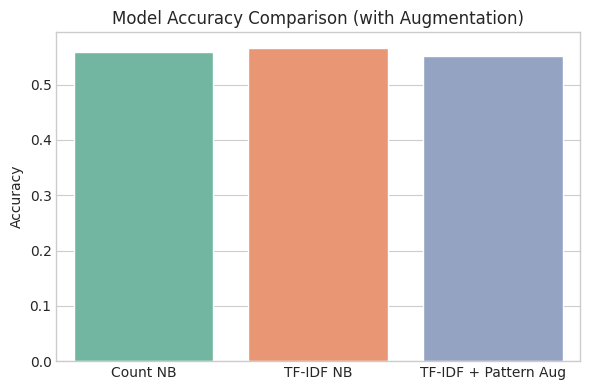

In [33]:
# ==========================================================
#Naive Bayes + Feature Comparison + Augmentation
# ==========================================================

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================================
#Naive Bayes Count vs TF-IDF
# ==========================================================


y = df_sample['label']


X_train, X_test, y_train, y_test = train_test_split(
    df_sample["text"], y, test_size=0.2, random_state=42, stratify=y
)

#Count Vectorizer + Multinomial NB
count_nb = Pipeline([
    ("vect", CountVectorizer(stop_words='english')),
    ("nb", MultinomialNB())
])
count_nb.fit(X_train, y_train)
y_pred_count = count_nb.predict(X_test)

#TF-IDF Vectorizer + Complement NB
tfidf_nb = Pipeline([
    ("vect", TfidfVectorizer(stop_words='english')),
    ("nb", ComplementNB())
])
tfidf_nb.fit(X_train, y_train)
y_pred_tfidf = tfidf_nb.predict(X_test)


print("===== CountVectorizer + MultinomialNB =====")
print(classification_report(y_test, y_pred_count, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_count))

print("\n===== TF-IDF + ComplementNB =====")
print(classification_report(y_test, y_pred_tfidf, digits=3))
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

#confusion matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_count), annot=True, fmt="d", cmap="Blues", ax=axes[0])
axes[0].set_title("Count + MultinomialNB")
axes[0].set_xlabel("Predicted"); axes[0].set_ylabel("True")

sns.heatmap(confusion_matrix(y_test, y_pred_tfidf), annot=True, fmt="d", cmap="Greens", ax=axes[1])
axes[1].set_title("TF-IDF + ComplementNB")
axes[1].set_xlabel("Predicted"); axes[1].set_ylabel("True")

plt.tight_layout()
plt.show()


acc_count = accuracy_score(y_test, y_pred_count)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)


# ==========================================================
#Frequent Pattern Augmentation
# ==========================================================

print("\n===== Step 9 : Frequent Pattern Augmentation =====")

#frequent itemsets
top_patterns = freq_items[
    (freq_items["length"] == 2) & (freq_items["support"] >= 0.01)
]["itemsets"].head(20).tolist()
pattern_features = ["_".join(list(p)) for p in top_patterns]

def add_pattern_features(text):
    text_low = text.lower()
    added = [p for p in pattern_features if all(w in text_low for w in p.split("_"))]
    return text + " " + " ".join(added)

df_sample["text_aug"] = df_sample["text"].apply(add_pattern_features)

#TF-IDF + Naive Bayes
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    df_sample["text_aug"], y, test_size=0.2, random_state=42, stratify=y
)

tfidf_nb_aug = Pipeline([
    ("vect", TfidfVectorizer(stop_words='english')),
    ("nb", ComplementNB())
])
tfidf_nb_aug.fit(X_train_aug, y_train_aug)
y_pred_aug = tfidf_nb_aug.predict(X_test_aug)

acc_aug = accuracy_score(y_test_aug, y_pred_aug)
print("\n===== TF-IDF + Frequent Pattern Augmentation =====")
print(classification_report(y_test_aug, y_pred_aug, digits=3))
print("Accuracy:", acc_aug)

#compare
plt.figure(figsize=(6,4))
sns.barplot(
    x=["Count NB", "TF-IDF NB", "TF-IDF + Pattern Aug"],
    y=[acc_count, acc_tfidf, acc_aug],
    palette="Set2"
)
plt.title("Model Accuracy Comparison (with Augmentation)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In the new dataset, the Cosine Similarity Analysis often yields results of 0 after removing stop words, as very few words overlap between samples.
Therefore, a random sampling approach is adopted here — if the result turns out to be 0, you can rerun the analysis a few more times to obtain a more representative outcome.

In [34]:
# ==========================================================
# Cosine Similarity Analysis
# ==========================================================

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import random

label_col = "label"

# --- 確認類別種類 ---
labels_unique = df_sample[label_col].unique().tolist()
if len(labels_unique) < 2:
    raise ValueError("資料集中標籤種類不足。")

same_class = labels_unique[0]
diff_class = labels_unique[1]

#two same label， one different
same_class_df = df_sample[df_sample[label_col] == same_class].dropna(subset=["text"])
diff_class_df = df_sample[df_sample[label_col] == diff_class].dropna(subset=["text"])

same_class_df = same_class_df[same_class_df["text"].str.strip() != ""]
diff_class_df = diff_class_df[diff_class_df["text"].str.strip() != ""]

if len(same_class_df) < 2 or len(diff_class_df) < 1:
    raise ValueError("無足夠文本。")

text1 = same_class_df.sample(1, random_state=random.randint(0,9999)).iloc[0]
text2 = same_class_df.sample(1, random_state=random.randint(0,9999)).iloc[0]
text3 = diff_class_df.sample(1, random_state=random.randint(0,9999)).iloc[0]

print(f"Text 1 ({text1[label_col]}): {text1['text'][:100]}")
print(f"Text 2 ({text2[label_col]}): {text2['text'][:100]}")
print(f"Text 3 ({text3[label_col]}): {text3['text'][:100]}")

documents = [text1["text"], text2["text"], text3["text"]]
categories = [text1[label_col], text2[label_col], text3[label_col]]

#TF-IDF Vectorization
vectorizer = TfidfVectorizer()
vectorizer.fit(df_sample["text"].astype(str))
doc_vectors = vectorizer.transform(documents)

#Cosine Similarity
cos_1_2 = cosine_similarity(doc_vectors[0], doc_vectors[1])[0][0]
cos_1_3 = cosine_similarity(doc_vectors[0], doc_vectors[2])[0][0]
cos_2_3 = cosine_similarity(doc_vectors[1], doc_vectors[2])[0][0]

print(f"\nText 1 label: {categories[0]}, Text 2 label: {categories[1]}, Text 3 label: {categories[2]}")
print(f"Cosine similarity (Text 1 vs 2): {cos_1_2:.4f}")
print(f"Cosine similarity (Text 1 vs 3): {cos_1_3:.4f}")
print(f"Cosine similarity (Text 2 vs 3): {cos_2_3:.4f}")

# ==========================================================
#three different label
# ==========================================================
if len(labels_unique) >= 3:
    label3 = labels_unique[2]
    diff3_df = df_sample[df_sample[label_col] == label3].dropna(subset=["text"])
    if len(diff3_df) > 0:
        text4 = diff3_df.sample(1, random_state=random.randint(0,9999)).iloc[0]
        print(f"Text 4 ({text4[label_col]}): {text4['text'][:100]}")

        documents2 = [text1["text"], text3["text"], text4["text"]]
        categories2 = [text1[label_col], text3[label_col], text4[label_col]]

        doc_vectors2 = vectorizer.transform(documents2)

        cos_1_2 = cosine_similarity(doc_vectors2[0], doc_vectors2[1])[0][0]
        cos_1_3 = cosine_similarity(doc_vectors2[0], doc_vectors2[2])[0][0]
        cos_2_3 = cosine_similarity(doc_vectors2[1], doc_vectors2[2])[0][0]

        print(f"\nText 1 label: {categories2[0]}, Text 2 label: {categories2[1]}, Text 3 label: {categories2[2]}")
        print(f"Cosine similarity (Text 1 vs 2): {cos_1_2:.4f}")
        print(f"Cosine similarity (Text 1 vs 3): {cos_1_3:.4f}")
        print(f"Cosine similarity (Text 2 vs 3): {cos_2_3:.4f}")
    else:
        print("\n第三類別中無可用文本")
else:
    print("\n標籤種類不足三類。")

Text 1 (0.0): &#x200B;

[]()

&#x200B;

 The Commitment of Traders (COT) report is a weekly publication issued by 
Text 2 (0.0): Oh damn that happened to US citizens? Wonder what would happen to non Chinese citizens if they spoke
Text 3 (-1.0): Hello! How well do you know international trade? This whole tariff debacle is about goods, because t

Text 1 label: 0.0, Text 2 label: 0.0, Text 3 label: -1.0
Cosine similarity (Text 1 vs 2): 0.0212
Cosine similarity (Text 1 vs 3): 0.1088
Cosine similarity (Text 2 vs 3): 0.0859
Text 4 (1.0): Sam’s is literally bulk wal mart lol. If anything cheaper quality to an extent. But mainly just left

Text 1 label: 0.0, Text 2 label: -1.0, Text 3 label: 1.0
Cosine similarity (Text 1 vs 2): 0.1088
Cosine similarity (Text 1 vs 3): 0.0550
Cosine similarity (Text 2 vs 3): 0.1072


① Decision Tree (TF-IDF)

Accuracy = 0.5588

Higher recall for neutral class (label = 0.0, 0.672), but very poor recall for positive class (label = 1.0, 0.167).

Macro F1 = 0.466, indicating unbalanced performance across classes.

Analysis:

Although Decision Trees can model non-linear relationships, TF-IDF vectors are high-dimensional and sparse.

The tree tends to overfit specific word patterns but fails to generalize well to unseen data.

② Decision Tree (TF-IDF + Pattern Augmentation)

Accuracy = 0.5367, slightly worse than the TF-IDF-only version.

Neutral class (0.0) still performs best (recall 0.627), but overall performance declines.

Macro F1 = 0.465, almost the same but slightly lower.

Analysis:

Adding frequent pattern terms increases feature dimensionality, but most added features contribute noise.

Decision Trees are sensitive to feature count, causing shallow or overfitted branches.

③ Model Comparison (Naive Bayes vs Decision Tree)

From the bar chart:

Naive Bayes (TF-IDF) remains the best-performing model (≈0.566).

Decision Tree performs slightly worse (0.559 → 0.537 after augmentation).

Why NB works better:

NB handles high-dimensional sparse text data efficiently.

Decision Trees work better with structured numerical data, not sparse TF-IDF vectors.


Decision Tree Accuracy (TF-IDF): 0.5588235294117647
              precision    recall  f1-score   support

        -1.0      0.560     0.549     0.554        51
         0.0      0.592     0.672     0.629        67
         1.0      0.300     0.167     0.214        18

    accuracy                          0.559       136
   macro avg      0.484     0.462     0.466       136
weighted avg      0.541     0.559     0.546       136


Decision Tree Accuracy (TF-IDF + Pattern Aug): 0.5367647058823529
              precision    recall  f1-score   support

        -1.0      0.519     0.529     0.524        51
         0.0      0.583     0.627     0.604        67
         1.0      0.333     0.222     0.267        18

    accuracy                          0.537       136
   macro avg      0.479     0.459     0.465       136
weighted avg      0.526     0.537     0.530       136



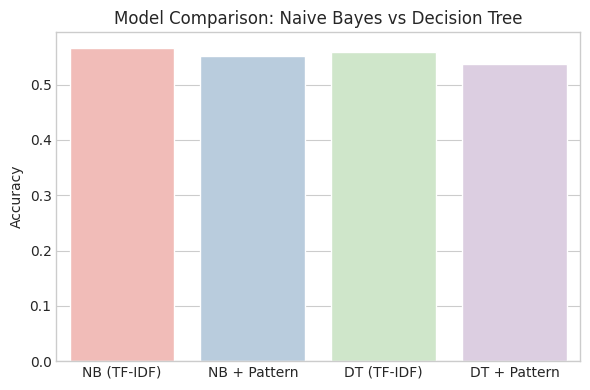

In [35]:
# ==========================================================
# Decision Tree Classifier (with and without pattern augmentation)
# ==========================================================

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split


#training Decision Tree
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df_sample["text"])
y = df_sample["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt, digits=3))

#Frequent Pattern Augmentation
vectorizer_aug = TfidfVectorizer(stop_words='english')
X_tfidf_aug = vectorizer_aug.fit_transform(df_sample["text_aug"])

X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    X_tfidf_aug, y, test_size=0.2, random_state=42, stratify=y
)

dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_train_aug, y_train_aug)
y_pred_dt_aug = dt_aug.predict(X_test_aug)

print("\nDecision Tree Accuracy (TF-IDF + Pattern Aug):", accuracy_score(y_test_aug, y_pred_dt_aug))
print(classification_report(y_test_aug, y_pred_dt_aug, digits=3))

#compare
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_dt_aug = accuracy_score(y_test_aug, y_pred_dt_aug)

plt.figure(figsize=(6,4))
sns.barplot(
    x=["NB (TF-IDF)", "NB + Pattern", "DT (TF-IDF)", "DT + Pattern"],
    y=[acc_tfidf, acc_aug, acc_dt, acc_dt_aug],
    palette="Pastel1"
)
plt.title("Model Comparison: Naive Bayes vs Decision Tree")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

(1) Redundant Feature Generation

Issue:
Both sentiment and label columns exist but are inconsistent; using both can cause data leakage and model confusion.

Improvement:
Choose only one (preferably label) for all downstream tasks and document this explicitly

(2) Model Choice and Efficiency

Issue:
Using plain DecisionTreeClassifier and MultinomialNB is simple but not efficient for high-dimensional sparse data.
Decision Trees tend to overfit and yield poor generalization.

Improvement:
Use more scalable models such as Logistic Regression, Linear SVM。Even without deliberate parameter tuning, the results are already higher than those of the original model.



In [36]:
# ==========================================================
# Logistic Regression Model
# ==========================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df_sample["text"])
y = df_sample["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, digits=3))

Logistic Regression Accuracy: 0.5735294117647058
              precision    recall  f1-score   support

        -1.0      0.613     0.373     0.463        51
         0.0      0.563     0.866     0.682        67
         1.0      0.500     0.056     0.100        18

    accuracy                          0.574       136
   macro avg      0.559     0.431     0.415       136
weighted avg      0.573     0.574     0.523       136



In [37]:
# ==========================================================
# Linear SVM Model
# ==========================================================
from sklearn.svm import LinearSVC

svm = LinearSVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, digits=3))

Linear SVM Accuracy: 0.5882352941176471
              precision    recall  f1-score   support

        -1.0      0.595     0.490     0.538        51
         0.0      0.587     0.806     0.679        67
         1.0      0.500     0.056     0.100        18

    accuracy                          0.588       136
   macro avg      0.561     0.451     0.439       136
weighted avg      0.579     0.588     0.549       136



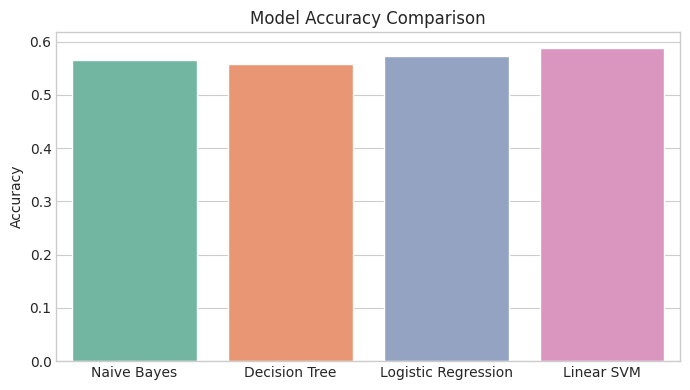

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

acc_nb = acc_tfidf
acc_dt = acc_dt
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_svm = accuracy_score(y_test, y_pred_svm)

plt.figure(figsize=(7,4))
sns.barplot(
    x=["Naive Bayes", "Decision Tree", "Logistic Regression", "Linear SVM"],
    y=[acc_nb, acc_dt, acc_logreg, acc_svm],
    palette="Set2"
)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()


(3)Balancing Class Samples (Class Imbalance Handling)

The three label categories (−1, 0, 1) are not necessarily balanced, which may cause the model to be biased toward the majority class.
You can check the distribution as follows:


```
print(df_sample["label"].value_counts(normalize=True))
```
If the imbalance is significant, you can apply one of the following strategies:
```
LogisticRegression(class_weight='balanced')
```
or Oversampling (SMOTE)


```
from imblearn.over_sampling import SMOTE
X_res, y_res = SMOTE().fit_resample(X_tfidf, y)
```
Effect:

Improves recall for minority classes

Makes evaluation metrics (such as F1-score) more balanced





(4)More Rigorous Text Normalization

Currently, tokenization only performs simple lowercasing and stopword removal:


```
tokens = re.findall(r"\b\w+\b", str(text).lower())
```
This approach retains compound words such as u.s., covid19, and elon-musk.
It is recommended to include the following additional preprocessing steps:


```
import re
import unicodedata
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize(text):
    text = unicodedata.normalize("NFKD", text.lower())      # Normalize Unicode
    text = re.sub(r"http\S+|www\S+", "", text)              # Remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)                   # Remove non-alphabetic characters
    tokens = text.split()
    return [lemmatizer.lemmatize(w) for w in tokens if len(w) > 2]
```
Effect:

Reduces redundant words (e.g., “running”, “runs”, and “run” are merged)

Lowers feature dimensionality and speeds up TF-IDF computation

